In [2]:
# random signals 2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import soundfile as sf
from IPython.display import Audio
from IPython.display import display
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/07_random_2/roulette.bin
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/07_random_2/water.bin
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/07_random_2/prase.wav

# >>>>>>>>>>>>>>>>> #data_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
Nroulette = 1000
with open('roulette.bin', 'rb') as f:
    ROULETTE = np.fromfile(f, np.uint8).reshape((Nroulette, -1)).T
OMEGAroulette = ROULETTE.shape[0]
print(ROULETTE.shape, OMEGAroulette)

# example of games 970...990 from days 18200..18210
print(ROULETTE[18200:18210,970:990])


--2024-11-13 07:02:11--  https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/07_random_2/roulette.bin
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/07_random_2/roulette.bin [following]
--2024-11-13 07:02:12--  https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/07_random_2/roulette.bin
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/07_random_2/roulette.bin [following]
--2024-11-13 07:02:13--  https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/07_random_2/roulette.bin
Reusing e

(1068, 320) 1068


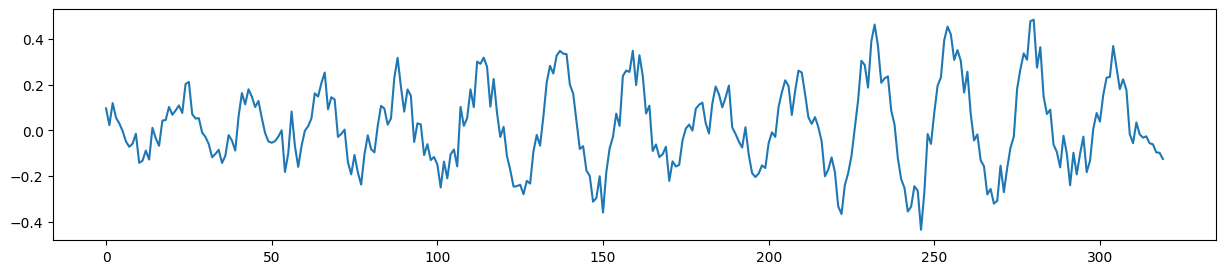

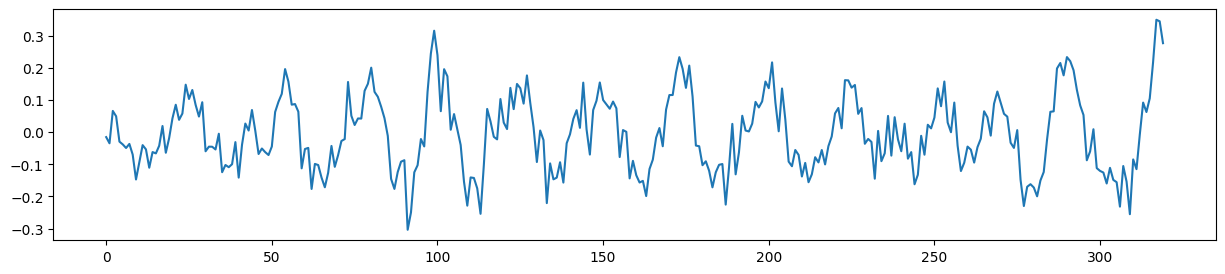

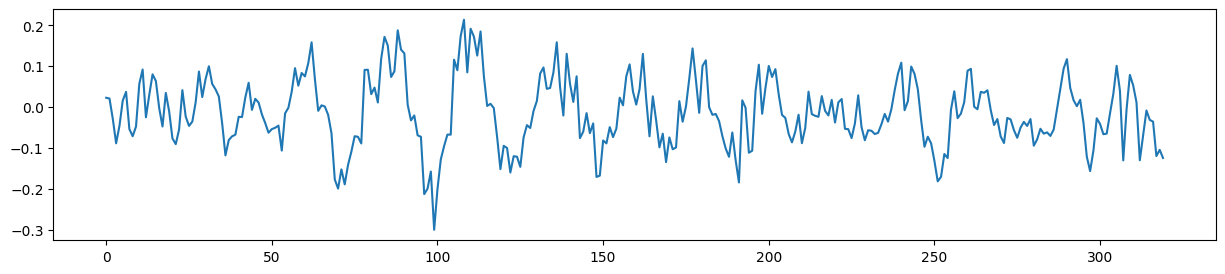

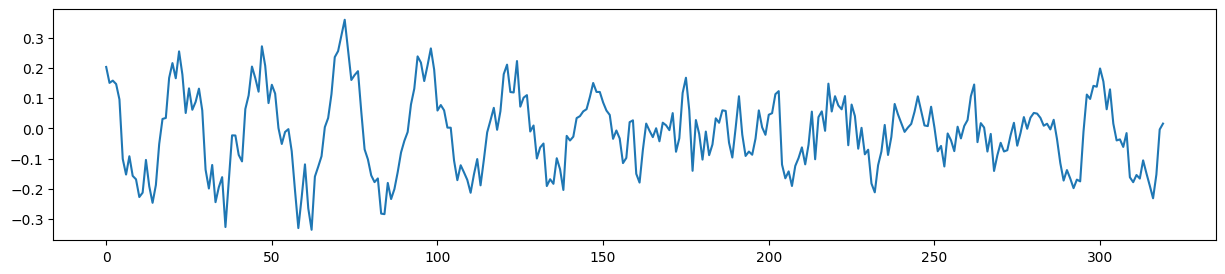

In [3]:
# >>>>>>>>>>>>>>>>> #data_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
Nwater = 320
Fs = 16000
with open('water.bin', 'rb') as f:
    WATER = np.fromfile(f, np.float32).reshape((Nwater,-1)).T
OMEGAwater = WATER.shape[0]
print(WATER.shape, OMEGAwater)

# visualize 4 different realizations
for omega in [4,100,900,1050]:
    plt.figure(figsize=(15,3))
    plt.plot(WATER[omega])
    display(Audio(WATER[omega], rate=Fs))

Text(0, 0.5, '$R[n_1, n_2]$')

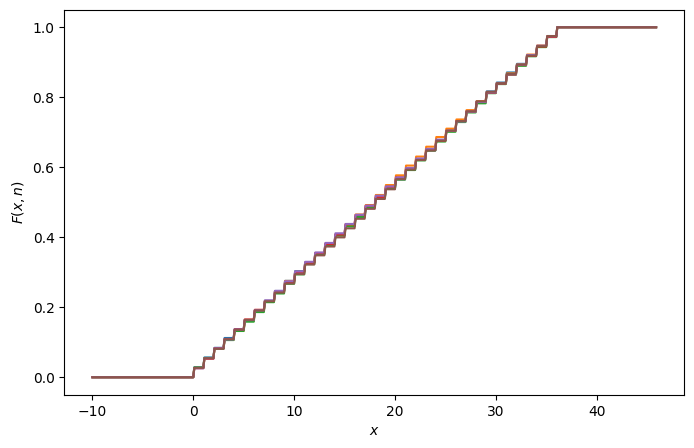

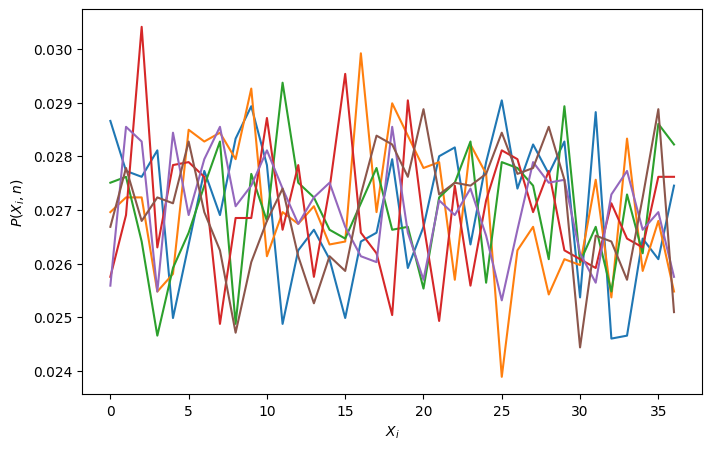

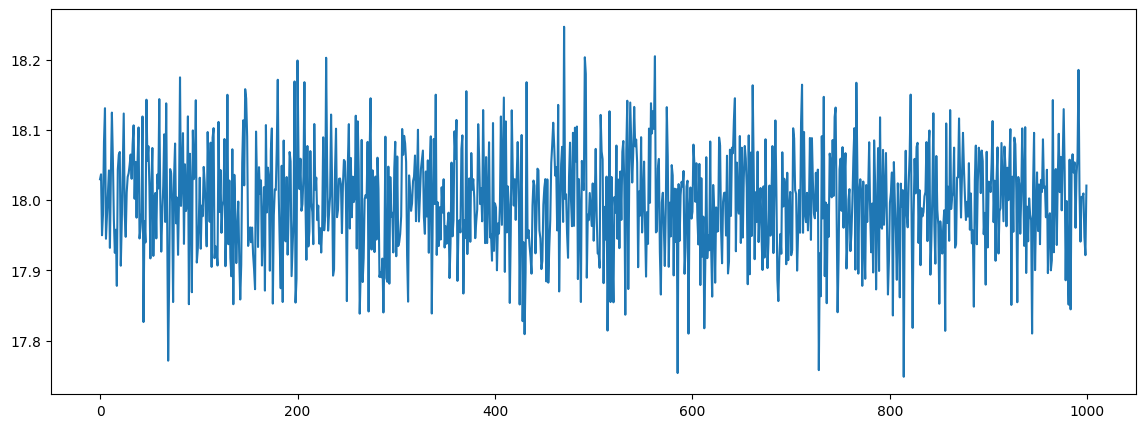

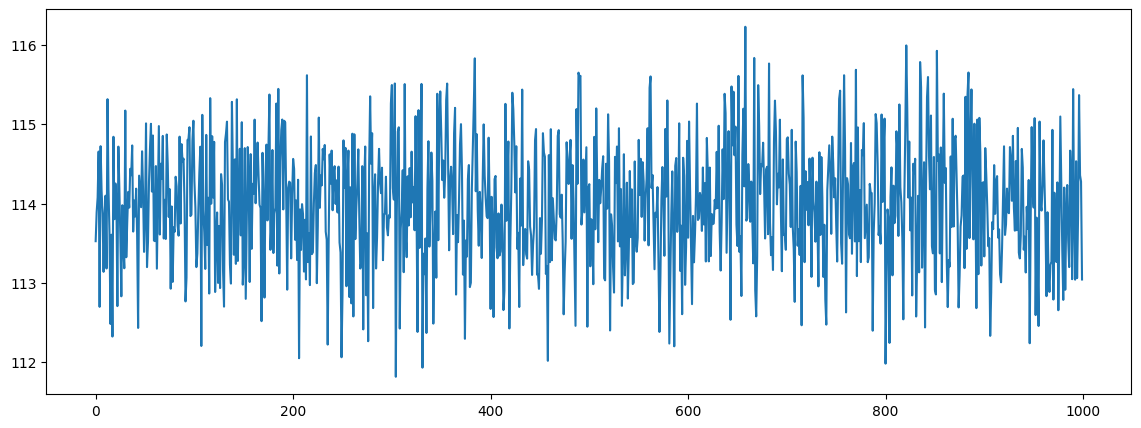

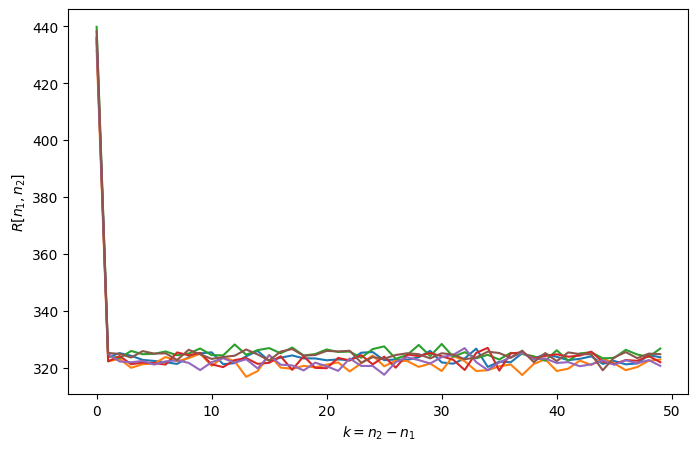

In [4]:
# >>>>>>>>>>>>>>>>> #stationarity_check_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
ns = [10, 250, 310, 500, 789, 900]  # <--- define samples we'll look at

# CDF
xall = np.arange(-10,46,0.1)   # reasonable range for a roulette.
Fxn = np.zeros(xall.shape)  # preparing space for CDF
plt.figure(figsize=(8,5))
for n in ns:
    data = ROULETTE[:,n]
    for (ii,x) in enumerate(xall):
        Fxn[ii] = np.sum(data < x) / OMEGAroulette
    plt.plot(xall,Fxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$F(x,n)$')

# probabilities
Xiall = np.arange(0,36+1)   # roulette has no other values
Pxn = np.zeros(Xiall.shape)  # preparing space for CDF
plt.figure(figsize=(8,5))
for n in ns:
    data = ROULETTE[:,n]
    for (ii,Xi) in enumerate(Xiall):
        Pxn[ii] = np.sum(data == Xi) / OMEGAroulette
    plt.plot(Xiall,Pxn)
plt.gca().set_xlabel('$X_i$')
plt.gca().set_ylabel('$P(X_i,n)$')

# means - for ALL samples
all_means = np.mean(ROULETTE, axis=0)    # want mean of each time !
plt.figure(figsize=(14,5))
plt.plot(all_means)

# variances - for ALL samples
all_vars = np.var(ROULETTE, axis=0)    # want mean of each time !
plt.figure(figsize=(14,5))
plt.plot(all_vars)

# correlation coefficients: n1 in various samples, and k always n1 + 0 ... 50 samples
plt.figure(figsize=(8,5))
Rs = np.zeros(50)
for n1 in ns:
    n2s = np.arange(n1, n1+50)
    for ii,n2 in enumerate(n2s):
        data1 = ROULETTE[:,n1].astype(float)  # this IS NECESSARY ! Otherwise screws up !
        data2 = ROULETTE[:,n2].astype(float)  # this IS NECESSARY ! Otherwise screws up !
        Rs[ii] = np.sum(data1 * data2) / OMEGAroulette
    plt.plot(n2s-n1,Rs)
plt.gca().set_xlabel('$k = n_2 - n_1$')
plt.gca().set_ylabel('$R[n_1, n_2]$')


Text(0, 0.5, '$R[n_1, n_2]$')

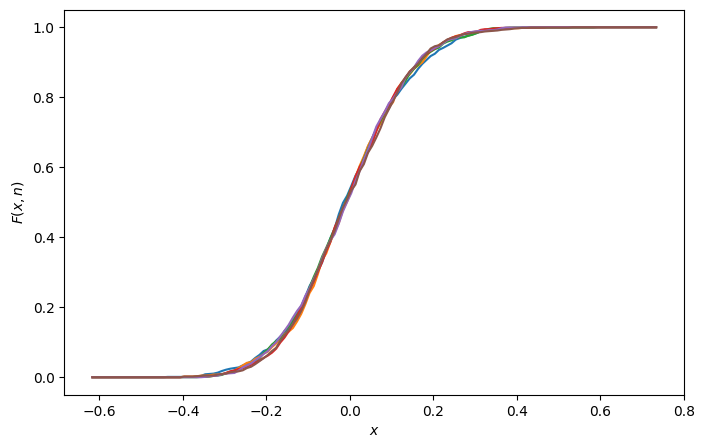

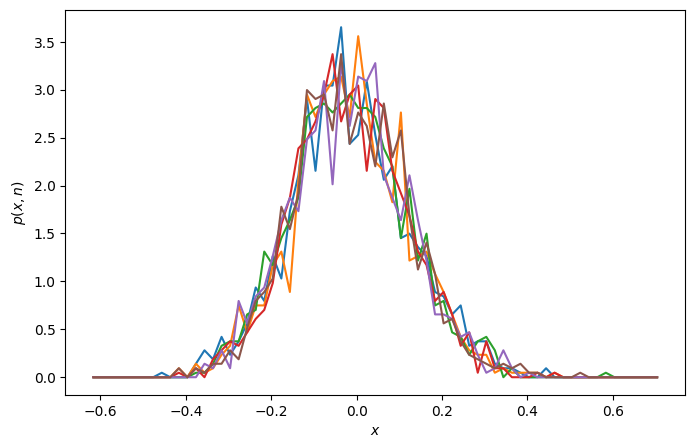

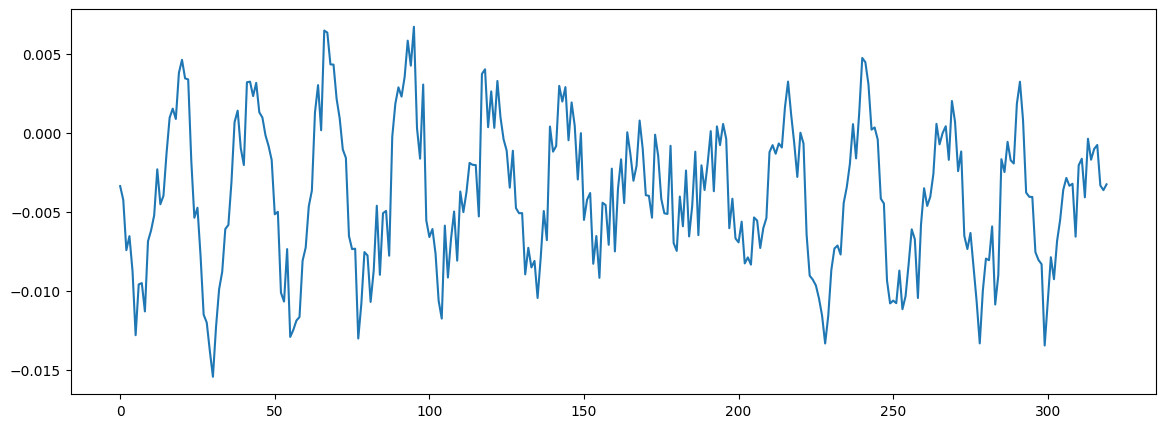

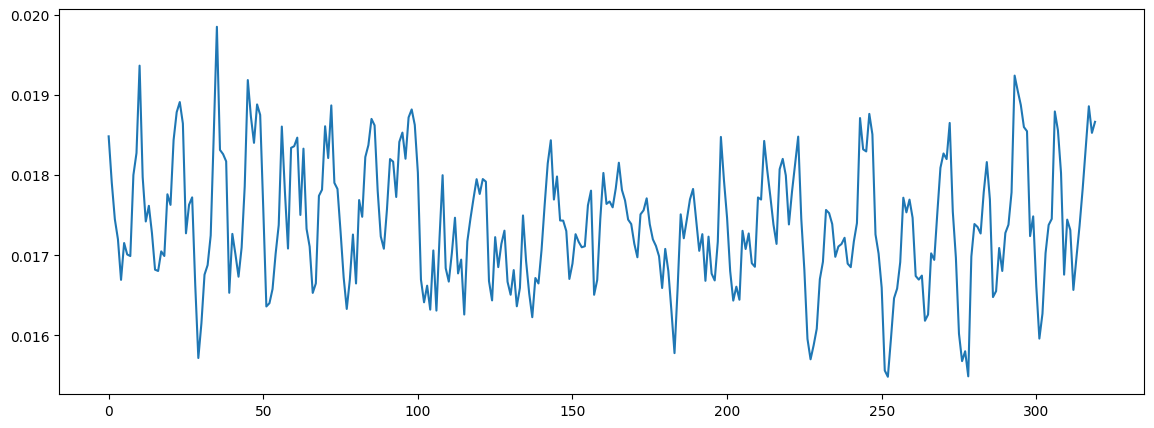

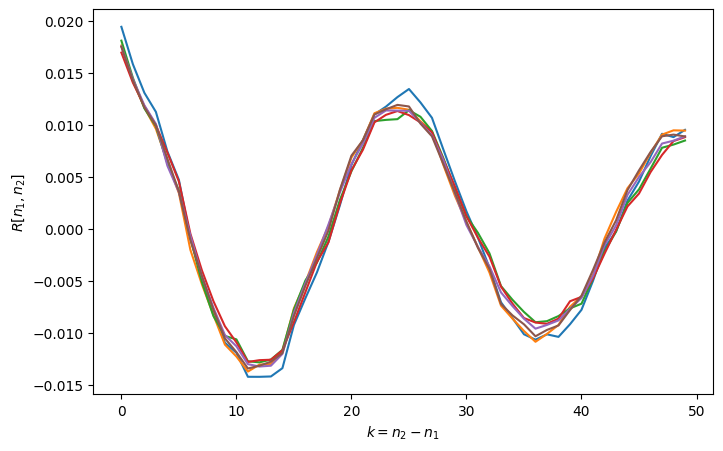

In [5]:
# >>>>>>>>>>>>>>>>> #stationarity_check_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
ns = [10, 50, 100, 150, 200, 260]  # <--- define samples we'll look at
minwater = np.min(WATER)
maxwater = np.max(WATER)
# CDF
xall = np.arange(minwater,maxwater,0.01)   # once for all ...
Fxn = np.zeros(xall.shape)  # preparing space for CDF
plt.figure(figsize=(8,5))
for n in ns:
    data = WATER[:,n]
    for (ii,x) in enumerate(xall):
        Fxn[ii] = np.sum(data < x) / OMEGAwater
    plt.plot(xall,Fxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$F(x,n)$')

# PDF
DELTA = 0.02
bins = np.arange(minwater,maxwater,DELTA)   # let the data decide ...
x = bins[:-1]
plt.figure(figsize=(8,5))
for n in ns:
    data = WATER[:,n]
    hist,_ = np.histogram(data, bins)
    pxn = hist / OMEGAwater / DELTA
    plt.plot(x,pxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$p(x,n)$')

# means - for ALL samples
all_means = np.mean(WATER, axis=0)    # want mean of each time !
plt.figure(figsize=(14,5))
plt.plot(all_means)

# variances - for ALL samples
all_vars = np.var(WATER, axis=0)    # want mean of each time !
plt.figure(figsize=(14,5))
plt.plot(all_vars)

# correlation coefficients: n1 in various samples, and k always n1 + 0 ... 50 samples
plt.figure(figsize=(8,5))
Rs = np.zeros(50)
for n1 in ns:
    n2s = np.arange(n1, n1+50)
    for ii,n2 in enumerate(n2s):
        data1 = WATER[:,n1]
        data2 = WATER[:,n2]
        Rs[ii] = np.sum(data1 * data2) / OMEGAwater
    plt.plot(n2s-n1,Rs)
plt.gca().set_xlabel('$k = n_2 - n_1$')
plt.gca().set_ylabel('$R[n_1, n_2]$')


10000
a =  18.0348 D =  114.46278895999998


Text(0, 0.5, '$R[k]$')

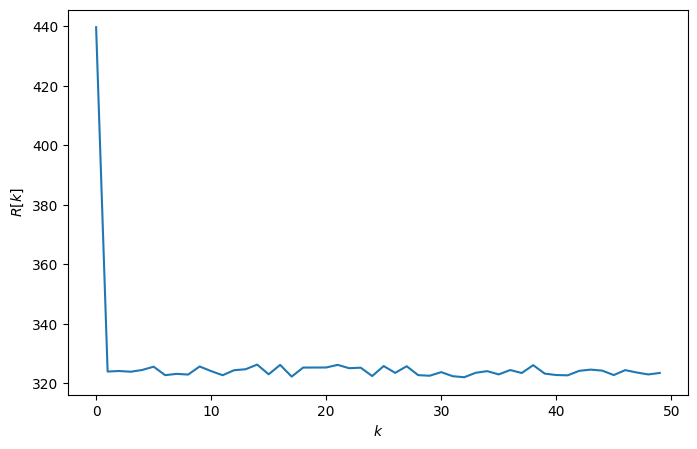

In [6]:
# >>>>>>>>>>>>>>>>> #ergodic_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
# let us make the observation a bit longer - 10 original ones, 10 * 1000 = 10000 samples in total
roulette_1 = ROULETTE[0:10,:].astype(float).flatten()
N = roulette_1.size
print(N)

# mean and variance
print("a = ",np.mean(roulette_1), "D = ",np.var(roulette_1))

# correlation coeffs
ks = np.arange(50)
Rs = np.zeros(ks.shape)
for ii,k in enumerate(ks):
    Rs[ii] = np.sum(roulette_1[:N-k] * roulette_1[k:]) / N
plt.figure(figsize=(8,5))
plt.plot(ks,Rs)
plt.gca().set_xlabel('$k$')
plt.gca().set_ylabel('$R[k]$')


3200
a =  -0.0034661388 D =  0.016771253


Text(0, 0.5, '$R[k]$')

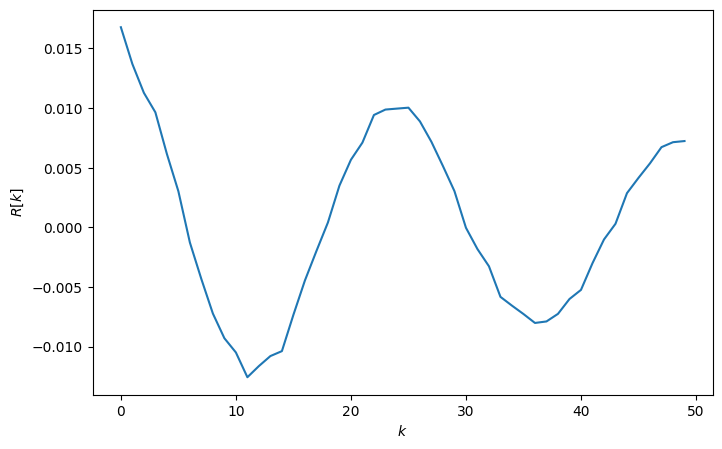

In [7]:
# >>>>>>>>>>>>>>>>> #ergodic_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
# let us make the observation a bit longer - 10 original ones, 10 * 320 = 3200 samples in total
water_1 = WATER[0:10,:].flatten()
N = water_1.size
print(N)

# mean and variance
print("a = ",np.mean(water_1), "D = ",np.var(water_1))

# correlation coeffs
ks = np.arange(50)
Rs = np.zeros(ks.shape)
for ii,k in enumerate(ks):
    Rs[ii] = np.sum(water_1[:N-k] * water_1[k:]) / N
plt.figure(figsize=(8,5))
plt.plot(ks,Rs)
plt.gca().set_xlabel('$k$')
plt.gca().set_ylabel('$R[k]$')


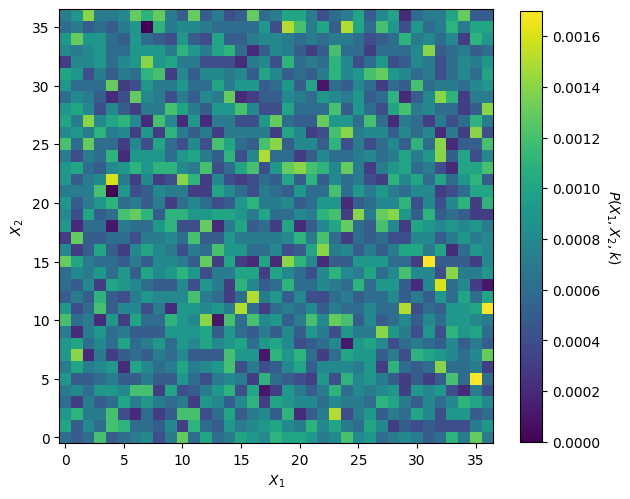

In [8]:
# >>>>>>>>>>>>>>>>> #ergodic_joint probabilities <<<<<<<<<<<<<<<<<<<<<<<<<
roulette_1 = ROULETTE[0:10,:].astype(float).flatten()
N = roulette_1.size
X1all = np.arange(0,36+1)   # roulette has no other values
X2all = np.arange(0,36+1)   # roulette has no other values
k = 2 # <--- set the distance in samples here
PX1X2k = np.zeros((X1all.size, X2all.size))
for ii,X1 in enumerate(X1all):
    for jj,X2 in enumerate(X2all):
        data1 = roulette_1[:N-k]
        data2 = roulette_1[k:]
        PX1X2k[ii,jj] = np.sum ((data1 == X1) & (data2 == X2)) / N
plt.figure(figsize=(7,7))
plt.pcolormesh(X1all, X2all, PX1X2k)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('$X_1$')
plt.gca().set_ylabel('$X_2$')
cbar = plt.colorbar(shrink=0.80)
cbar.set_label('$P(X_1, X_2, k)$', rotation=270, labelpad=15)


mean1 =  0.9757687244066642  mean2 =  -3.9915837640507736 mean3 =  -2.968174478947071


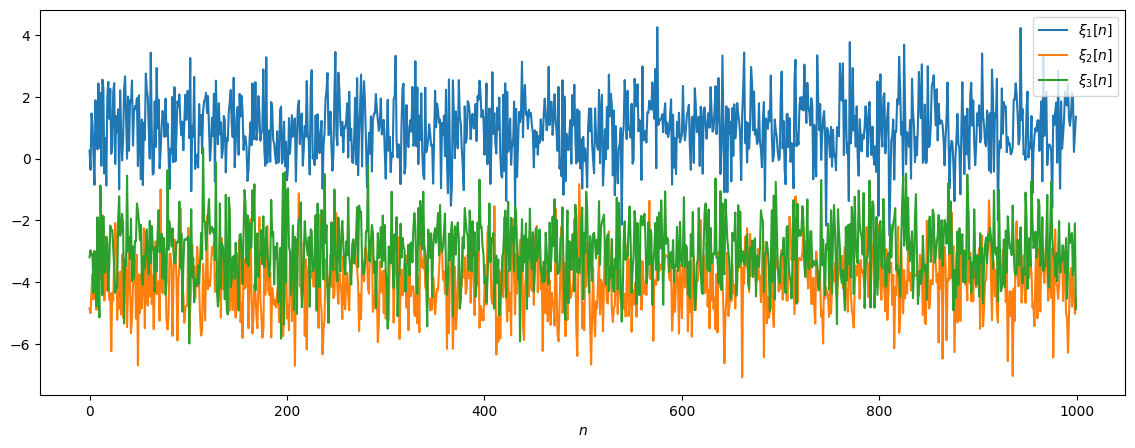

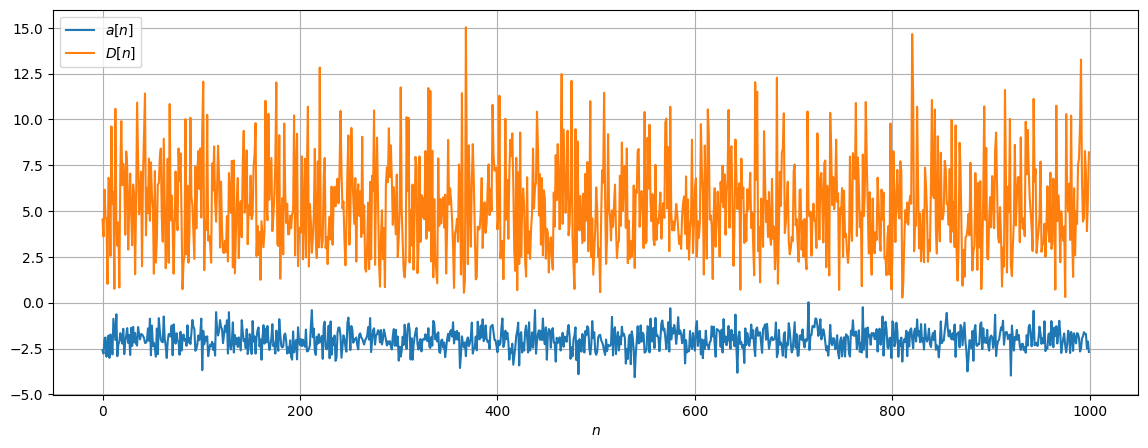

In [9]:
# >>>>>>>>>>>>>>>>> #stationary_non_ergodic <<<<<<<<<<<<<<<<<<<<<<<<<
# example of stationary but not ergodic signal ...
N = 1000
realization1 = np.random.standard_normal(N) + 1
realization2 = np.random.standard_normal(N) - 4
realization3 = np.random.standard_normal(N) - 3
REALIZATIONS = np.array([realization1.T, realization2.T, realization3.T]).T
#print(realization1.shape, REALIZATIONS.shape)
plt.figure(figsize=(14,5))
plt.plot(realization1,label=r'$\xi_1[n]$')
plt.plot(realization2,label=r'$\xi_2[n]$')
plt.plot(realization3,label=r'$\xi_3[n]$')
plt.gca().set_xlabel('$n$')
plt.gca().legend()

# ensemble estimate of means and variances
all_means = np.mean(REALIZATIONS, axis=1)    # want mean of each time !
all_vars = np.var(REALIZATIONS, axis=1)      # dtto for variance
plt.figure(figsize=(14,5))
plt.plot(all_means,label=r'$a[n]$')
plt.plot(all_vars,label=r'$D[n]$')
plt.gca().set_xlabel('$n$')
plt.gca().legend()
plt.gca().grid()

# temporal estimates
a1 = np.mean (realization1)
a2 = np.mean (realization2)
a3 = np.mean (realization3)
print("mean1 = ",a1, " mean2 = ",a2, "mean3 = ",a3)


mean =  4.982687398022972  variance =  3.98939906539903


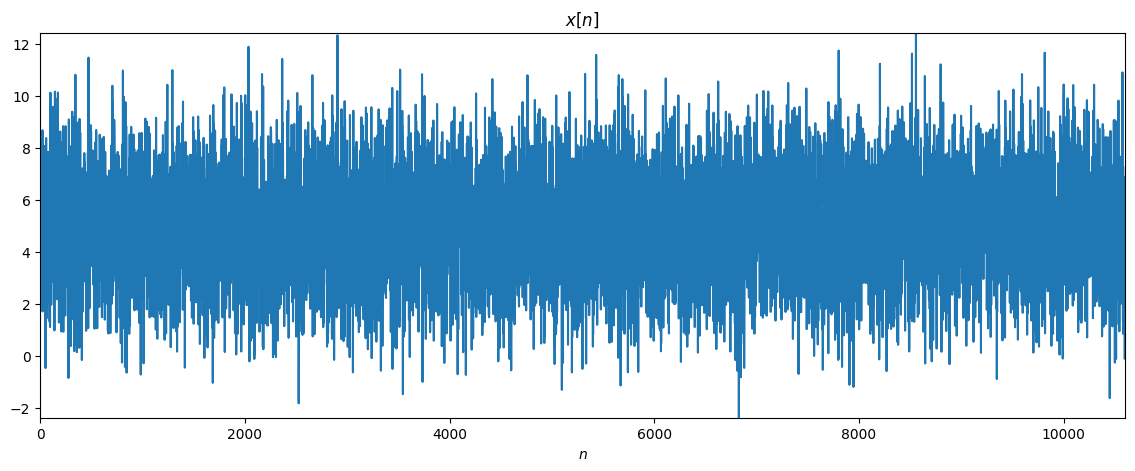

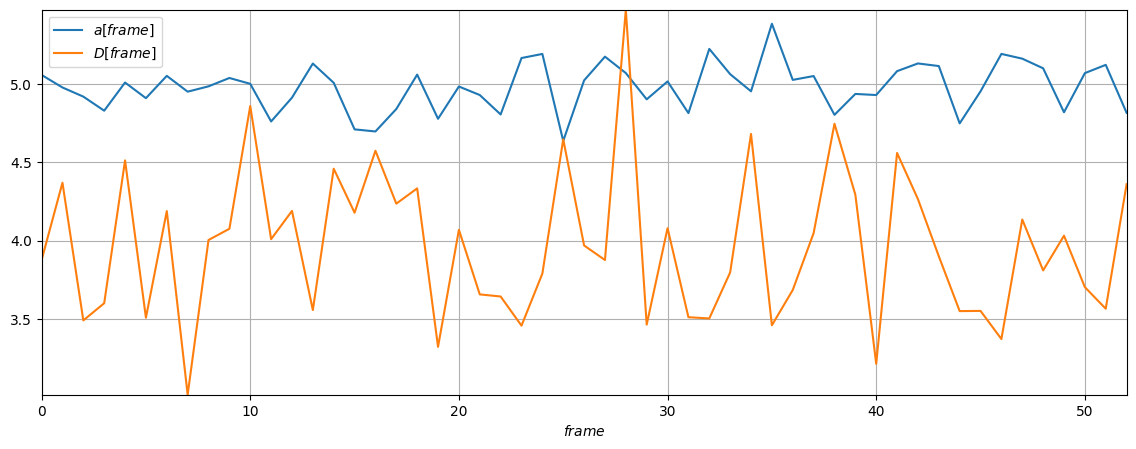

In [10]:
# >>>>>>>>>>>>>>>>> #stationary_signal <<<<<<<<<<<<<<<<<<<<<<<<<
N = 10600
frame_len = 200
x = 2 * np.random.standard_normal(N) + 5
FRAMES = np.reshape(x,(-1,frame_len))
all_means = np.mean(FRAMES, axis=1)    # want mean of each time !
all_vars = np.var(FRAMES, axis=1)      # dtto for variance

# signal
plt.figure(figsize=(14,5))
plt.plot(x)
plt.gca().set_xlabel('$n$')
plt.gca().set_title('$x[n]$')
plt.gca().autoscale(enable=True, axis='both', tight=True)

# means and vars of frames
plt.figure(figsize=(14,5))
plt.plot(all_means,label=r'$a[frame]$')
plt.plot(all_vars,label=r'$D[frame]$')
plt.gca().set_xlabel('$frame$')
plt.gca().legend()
plt.gca().grid()
plt.gca().autoscale(enable=True, axis='both', tight=True)

# global estimates
a = np.mean (x)
D = np.var (x)
print("mean = ",a, " variance = ",D)


mean =  6.3804190373351475e-06  variance =  0.013513321259551065


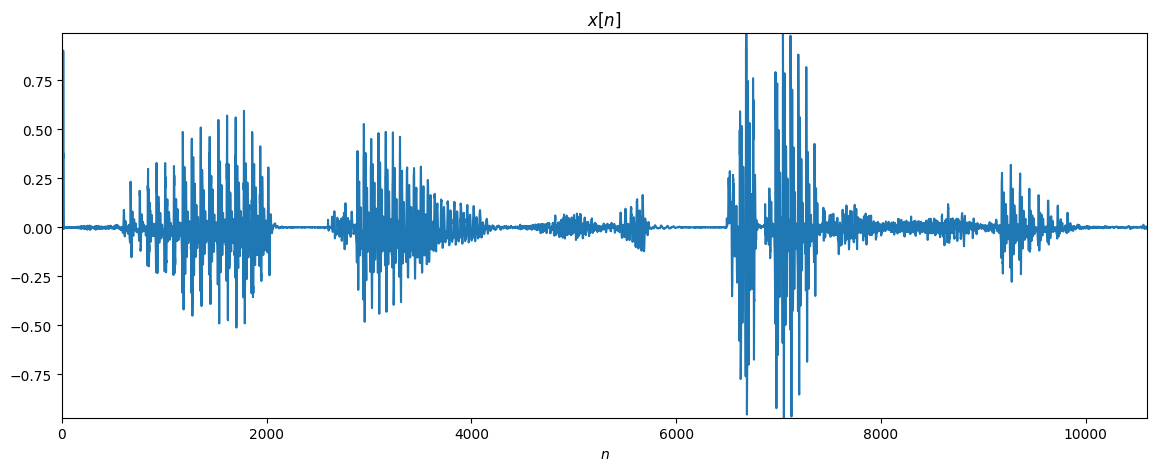

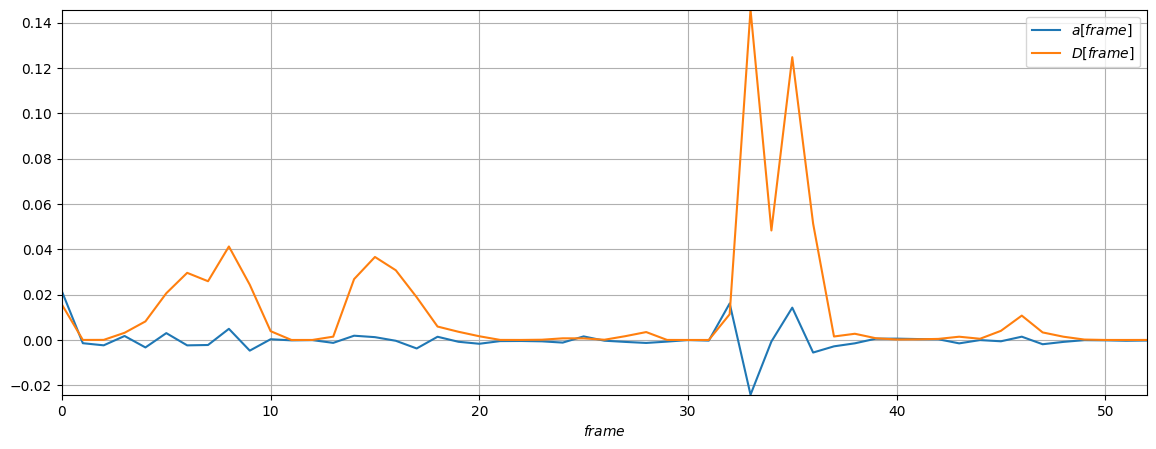

In [11]:
# >>>>>>>>>>>>>>>>> #non_stationary_signal <<<<<<<<<<<<<<<<<<<<<<<<<
x, Fs = sf.read('prase.wav')
x = x[:10600] - np.mean(x)
display(Audio(x, rate=Fs))
FRAMES = np.reshape(x,(-1,frame_len))
all_means = np.mean(FRAMES, axis=1)    # want mean of each time !
all_vars = np.var(FRAMES, axis=1)      # dtto for variance

# signal
plt.figure(figsize=(14,5))
plt.plot(x)
plt.gca().set_xlabel('$n$')
plt.gca().set_title('$x[n]$')
plt.gca().autoscale(enable=True, axis='both', tight=True)

# means and vars of frames
plt.figure(figsize=(14,5))
plt.plot(all_means,label=r'$a[frame]$')
plt.plot(all_vars,label=r'$D[frame]$')
plt.gca().set_xlabel('$frame$')
plt.gca().legend()
plt.gca().grid()
plt.gca().autoscale(enable=True, axis='both', tight=True)

# global estimates
a = np.mean (x)
D = np.var (x)
print("mean = ",a, " variance = ",D)


(1068, 320) 1068


Text(0.5, 1.0, '$R[k]$')

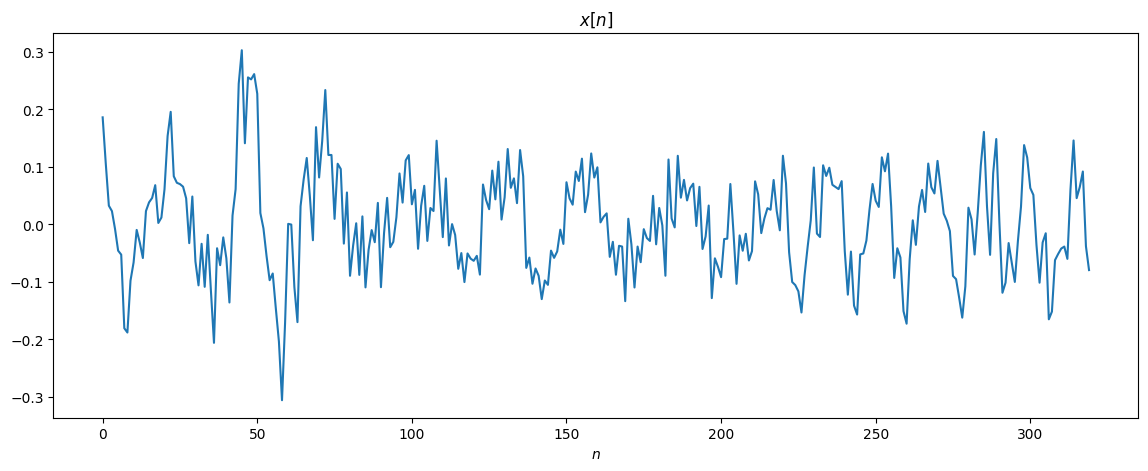

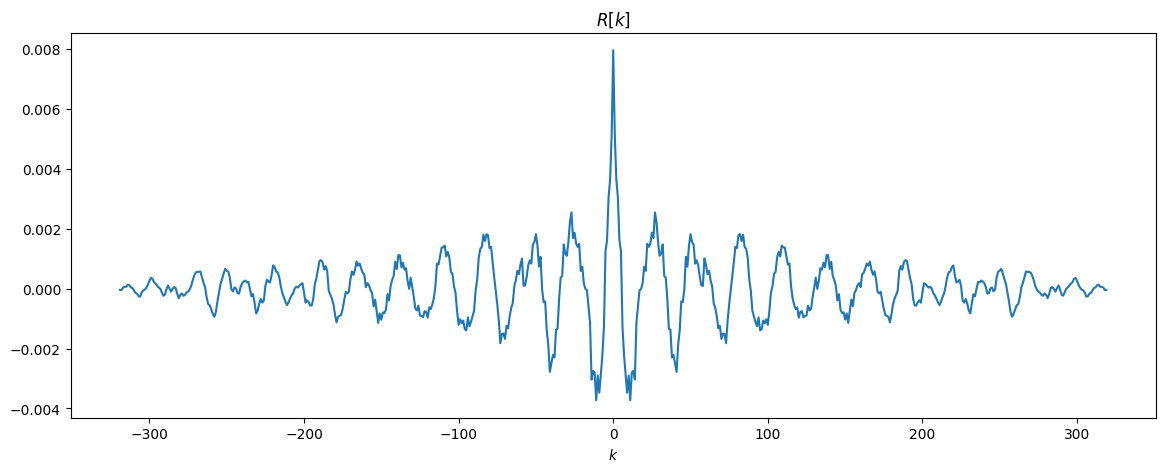

In [12]:
# >>>>>>>>>>>>>>>>> #biased_Rk_estimate <<<<<<<<<<<<<<<<<<<<<<<<<
Nwater = 320
Fs = 16000
with open('water.bin', 'rb') as f:
    WATER = np.fromfile(f, np.float32).reshape((Nwater,-1)).T
OMEGAwater = WATER.shape[0]
print(WATER.shape, OMEGAwater)

# selecting a good realization to demonstrate ...
x = WATER[23]
N = Nwater

# signal
plt.figure(figsize=(14,5))
plt.plot(x)
plt.gca().set_xlabel('$n$')
plt.gca().set_title('$x[n]$')

# corr coeff
Rk = np.correlate(x, x, mode='full') / N
#print(Rk.shape)
k = np.arange(-(N-1),N)
plt.figure(figsize=(14,5))
plt.plot(k, Rk)
plt.gca().set_xlabel('$k$')
plt.gca().set_title('$R[k]$')


(639,)


Text(0.5, 1.0, '$R[k]$')

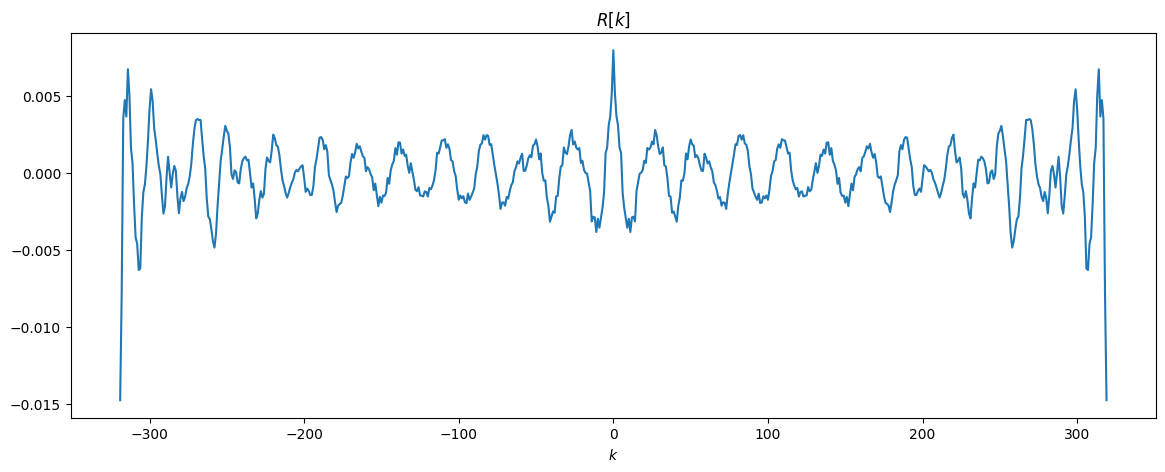

In [13]:
# >>>>>>>>>>>>>>>>> #unbiased_Rk_estimate <<<<<<<<<<<<<<<<<<<<<<<<<

# corr coeff
k = np.arange(-(N-1),N)
normalizers = N - np.abs(k)
Rk = np.correlate(x, x, mode='full') / normalizers
print(Rk.shape)
plt.figure(figsize=(14,5))
plt.plot(k, Rk)
plt.gca().set_xlabel('$k$')
plt.gca().set_title('$R[k]$')


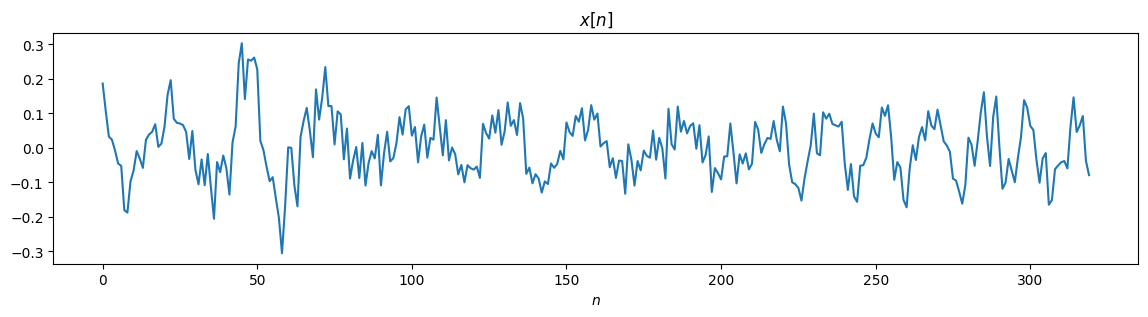

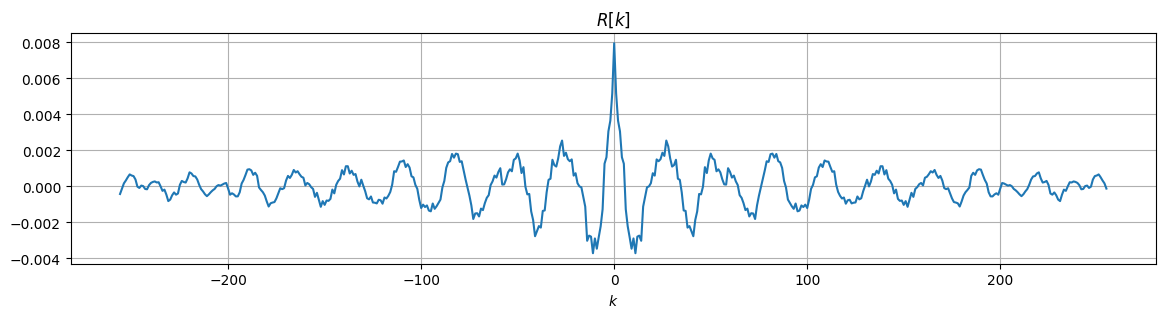

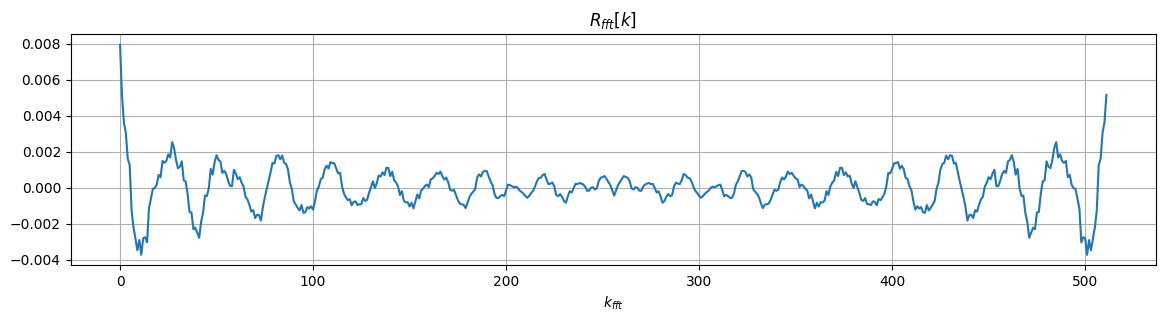

In [14]:
# >>>>>>>>>>>>>>>>> #power_spec_density_from_Rk <<<<<<<<<<<<<<<<<<<<<<<<<
x = WATER[23]
N = Nwater
Nfft = 512
Nffthalf = int(Nfft / 2)

# signal
plt.figure(figsize=(14,3))
plt.plot(x)
plt.gca().set_xlabel('$n$')
plt.gca().set_title('$x[n]$')

# corr coeff - need to pick a good number for FFT ...
Rk = np.correlate(x, x, mode='full') / N
k = np.arange(-Nffthalf,Nffthalf)
Rk = Rk[k + N-1]    # attention, needs to re-index as k=0 is at Nth sample !
kfft = np.arange(Nfft)
Rkfft = np.fft.fftshift(Rk)         # shift it for FFT !
plt.figure(figsize=(14,3))
plt.plot(k, Rk)
plt.gca().set_xlabel('$k$')
plt.gca().set_title('$R[k]$')
plt.gca().grid()
plt.figure(figsize=(14,3))
plt.plot(kfft, Rkfft)
plt.gca().set_xlabel('$k_{fft}$')
plt.gca().set_title('$R_{fft}[k]$')
plt.gca().grid()

# ... go to the nbext box ;)

[ 7.46483238e-03+0.j  6.42042185e-03+0.j  1.04535964e-02+0.j
 -3.53651214e-03+0.j  5.40533314e-03+0.j -4.46453928e-03+0.j
  5.49413835e-03+0.j -4.61590931e-03+0.j  5.71333379e-03+0.j
 -5.19018772e-03+0.j  6.92203553e-03+0.j -5.18972574e-03+0.j
  9.07400253e-03+0.j -4.53933494e-03+0.j  1.19665823e-02+0.j
  2.69791092e-04+0.j  1.40817217e-02+0.j  2.77741772e-02+0.j
  1.93701991e-01+0.j  2.82816913e-01+0.j]
[ 0.00078789+0.j  0.00541889+0.j  0.01194877+0.j  0.00880745+0.j
 -0.00270797+0.j -0.00875543+0.j -0.00139863+0.j  0.00944921+0.j
  0.00812756+0.j -0.00506205+0.j -0.01201664+0.j -0.00027486+0.j
  0.0173797 +0.j  0.01573267+0.j -0.00844059+0.j -0.02242871+0.j
  0.0124819 +0.j  0.09517659+0.j  0.1750357 +0.j  0.19500537+0.j]


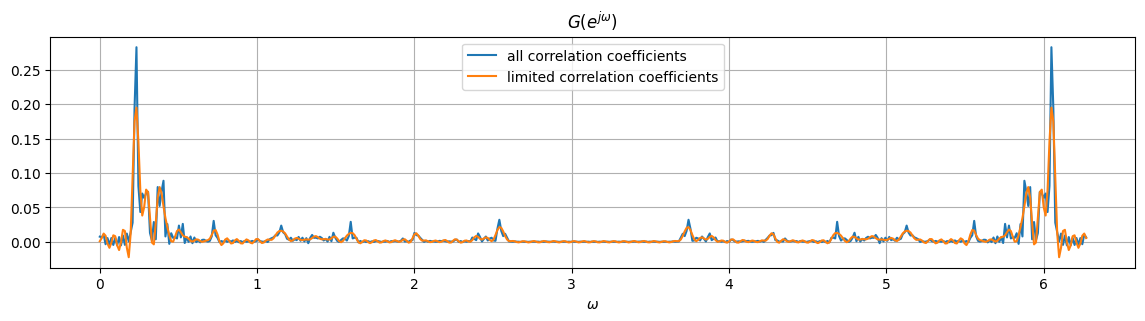

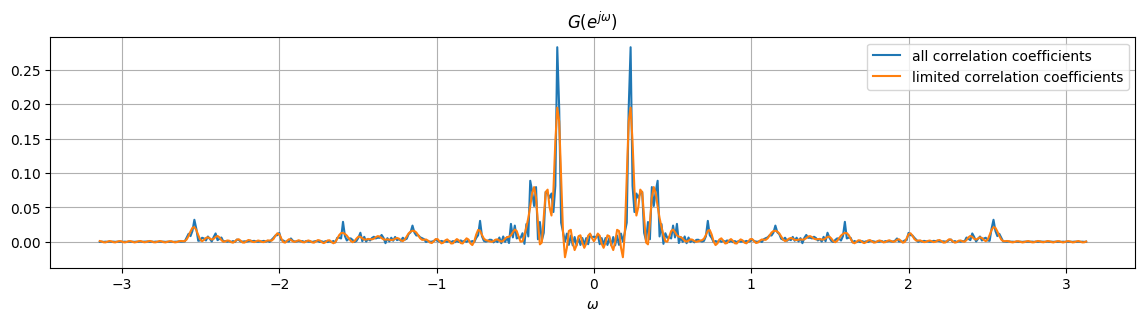

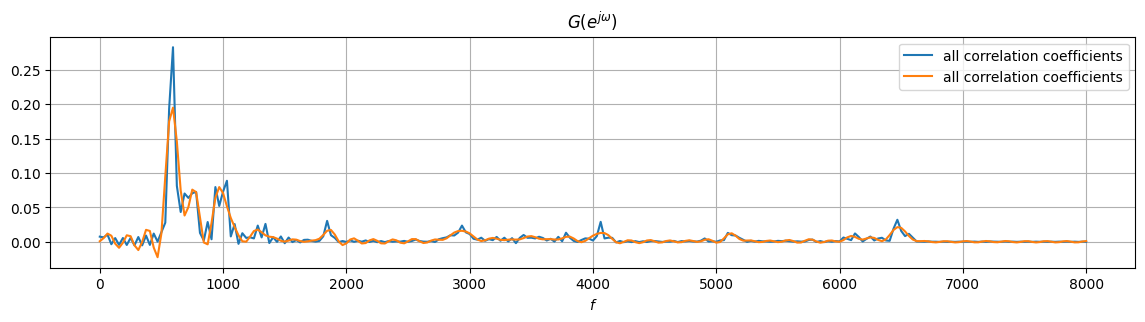

In [15]:
# estimate PSD and make a nice frequency axis - from original Rks and from shortened
Gejo = np.fft.fft (Rkfft)
print(Gejo[0:20])
Gejo = np.real(Gejo)

Nshort = 100
Rkfft_short = Rkfft.copy()    # need to use the copy method !
Rkfft_short[Nshort:Nfft-Nshort+1] = 0   # +1 because of Pythone sequence end ...
Gejo_short = np.fft.fft (Rkfft_short)
print(Gejo_short[0:20])
Gejo_short = np.real(Gejo_short)

om = kfft * 2 * np.pi / Nfft
plt.figure(figsize=(14,3))
plt.plot(om, Gejo, label='all correlation coefficients')
plt.plot(om, Gejo_short, label='limited correlation coefficients')
plt.gca().set_xlabel('$\omega$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()
plt.gca().legend()
om_incl_neg = np.arange(-Nffthalf,Nffthalf) * 2 * np.pi / Nfft
plt.figure(figsize=(14,3))
plt.plot(om_incl_neg, np.fft.fftshift(Gejo),label='all correlation coefficients')
plt.plot(om_incl_neg, np.fft.fftshift(Gejo_short),label='limited correlation coefficients')
plt.gca().set_xlabel('$\omega$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()
plt.gca().legend()

# half in Hz ...
khalf = np.arange(Nffthalf+1)
f = khalf / Nfft * Fs
plt.figure(figsize=(14,3))
plt.plot(f, Gejo[khalf],label='all correlation coefficients')
plt.plot(f, Gejo_short[khalf],label='all correlation coefficients')
plt.gca().set_xlabel('$f$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()
plt.gca().legend()


[2.17989851e-03+0.00000000e+00j 9.72777690e-03+2.27517072e-20j
 1.65277134e-03-2.87118371e-20j 6.83653961e-04-9.22491627e-21j
 5.18780732e-04+1.55858779e-20j 2.31313814e-04+2.96512876e-22j
 3.09821482e-04+2.77970961e-21j 2.42554906e-04+1.18512967e-21j
 2.60058843e-03-7.75344951e-20j 7.49169637e-03+5.21913155e-20j
 2.07495598e-03-1.86340396e-20j 9.77791131e-02-9.36376889e-20j
 2.62985598e-01+2.46586626e-18j 5.53287722e-02+2.57674564e-18j
 7.74524527e-02+2.28237447e-20j 6.32881578e-02+2.79463069e-19j
 2.87532948e-02+1.52096062e-21j 1.05872197e-02+7.53169516e-20j
 1.50330847e-02-1.98083390e-19j 9.97449981e-02+1.99442051e-18j]


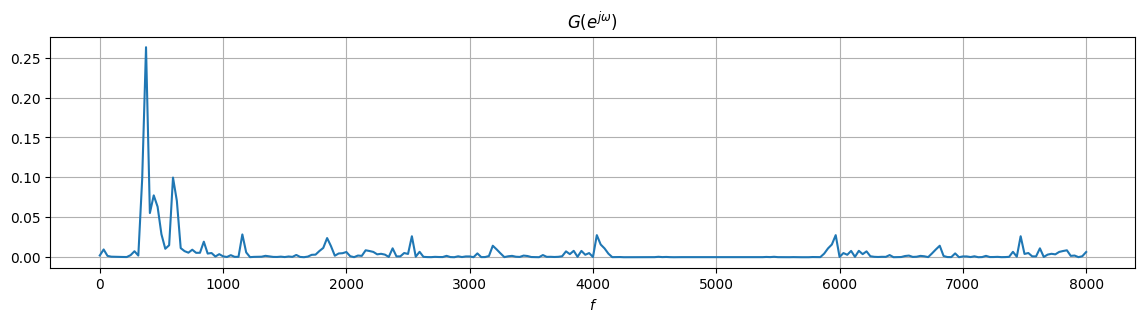

In [16]:
# >>>>>>>>>>>>>>>>> #power_spec_density_from_signal <<<<<<<<<<<<<<<<<<<<<<<<<
x = WATER[23]
N = Nwater
Nfft = 512
Nffthalf = int(Nfft / 2)
xfft  = np.pad(x, (0, Nfft - N), 'constant', constant_values=0)   # need to zero pad to have 512 points

# --- estimate PSD using FFT
X = np.fft.fft(x)
Gejo_fft = X * np.conj(X) / N    # fast way to compute abs. value power 2 ...
print(Gejo_fft[0:20])
Gejo_fft = np.real(Gejo_fft)

plt.figure(figsize=(14,3))
plt.plot(f, Gejo_fft[khalf])
plt.gca().set_xlabel('$f$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()


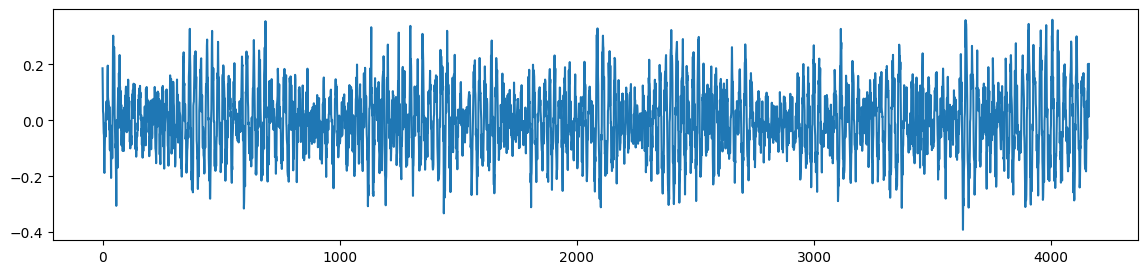

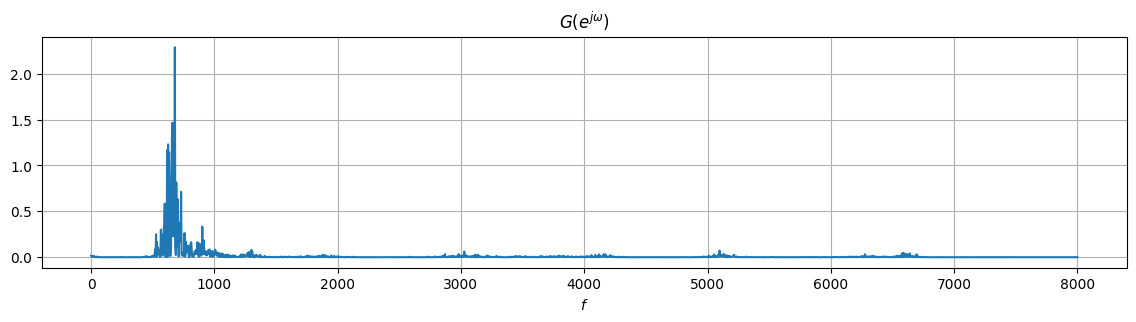

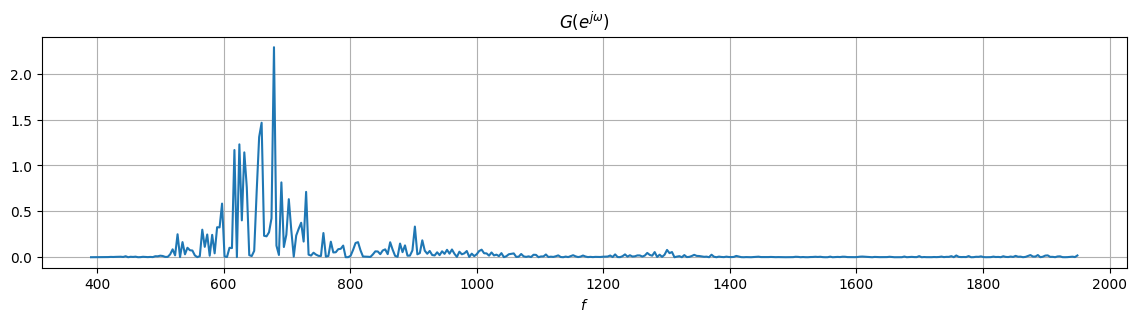

In [17]:
# >>>>>>>>>>>>>>>>> #power_spec_density_from_longer_signal <<<<<<<<<<<<<<<<<<<<<<<<<
x = WATER[23:36,:].flatten()
N = 4096
Nfft = 4096
Nffthalf = int(Nfft / 2)
xfft  = x[0:Nfft] # shorten signal to 4096 points
#print(xfft.size)

plt.figure(figsize=(14,3))
plt.plot(x)

# --- estimate PSD using FFT
X = np.fft.fft(x)
khalf = np.arange(Nffthalf+1)
f = khalf / Nfft * Fs

Gejo_fft = X * np.conj(X) / N    # fast way to compute abs. value power 2 ...
#print(Gejo_fft[0:20])
Gejo_fft = np.real(Gejo_fft)

plt.figure(figsize=(14,3))
plt.plot(f, Gejo_fft[khalf])
plt.gca().set_xlabel('$f$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()

# also some zoom ...
kzoom = np.arange(100,500)
plt.figure(figsize=(14,3))
plt.plot(f[kzoom], Gejo_fft[kzoom])
plt.gca().set_xlabel('$f$')
plt.gca().set_title('$G(e^{j\omega})$')
plt.gca().grid()

13 4160 16000


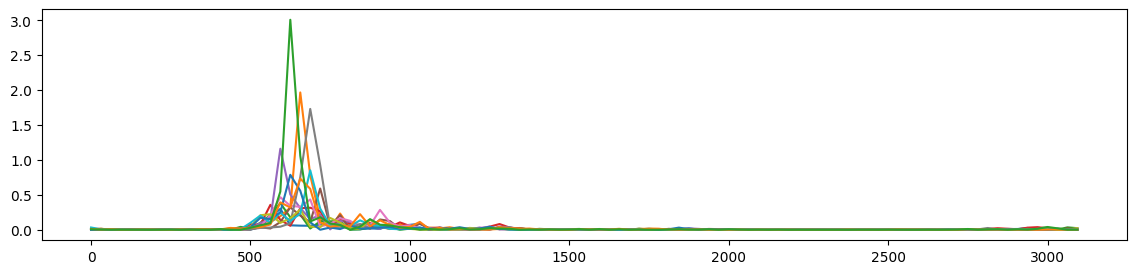

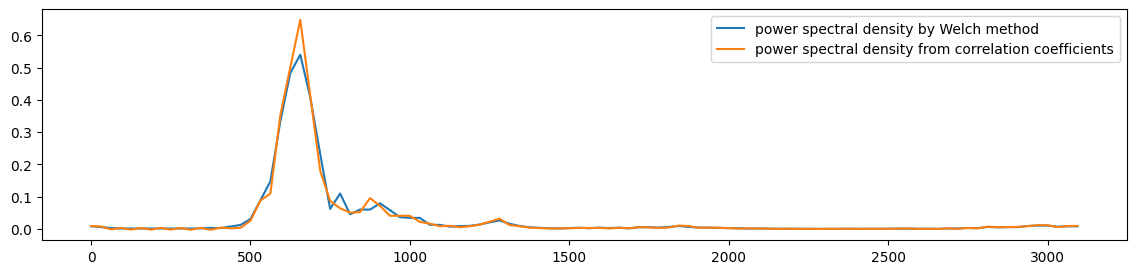

In [18]:
# >>>>>>>>>>>>>>>>> #power_spec_density_welch <<<<<<<<<<<<<<<<<<<<<<<<<
x = WATER[23:36,:].flatten()
N = x.size
frame_len = 320                 # could use original realizations but wants to have it general ...
Nfft = 512
Nffthalf = int(Nfft / 2)

# segment to frames
FRAMES = np.reshape(x,(-1,frame_len))
Nfr = FRAMES.shape[0]
print(Nfr, N, Fs)
plt.figure(figsize=(14,3))
khalf = np.arange(Nffthalf+1)
f = khalf / Nfft * Fs
kzoom = np.arange(0,100)         # zoom in some lower frequencies

# compute PSD by Welch
Gejo_welch = np.zeros(Nffthalf + 1)   # acuumulator for frame estimates
for frame in FRAMES:      # pedagogical implementation ... would be faster by matrices
    xfft  = np.pad(frame, (0, Nfft - frame_len), 'constant', constant_values=0)
    X = np.fft.fft(xfft)
    Gejo_fft = np.real(X[khalf] * np.conj(X[khalf])) / frame_len
    plt.plot(f[kzoom], Gejo_fft[kzoom])
    Gejo_welch = Gejo_welch + Gejo_fft
Gejo_welch = Gejo_welch / Nfr          # normalization by number of frames
plt.figure(figsize=(14,3))
plt.plot(f[kzoom], Gejo_welch[kzoom], label='power spectral density by Welch method')

# check: PSD from correlation coefficients of the whole thing
Rk = np.correlate(x, x, mode='full') / N
k = np.arange(-Nffthalf,Nffthalf)
Rk = Rk[k + N-1]    # attention, needs to re-index as k=0 is at Nth sample !
Rkfft = np.fft.fftshift(Rk)
Gejo = np.real(np.fft.fft(Rkfft))
plt.plot(f[kzoom], Gejo[kzoom], label='power spectral density from correlation coefficients')
plt.gca().legend()


In [19]:
# >>>>>>>>>>>>>>>>> #powers <<<<<<<<<<<<<<<<<<<<<<<<<
P = np.sum(np.power(x,2)) / N
R0 = Rkfft[0]
a = np.mean(x)
D = np.var(x)
P_stats = D + a ** 2
P_Gejo = np.sum(Gejo) / Nfft * 2 * np.pi / 2 / np.pi   # / Nfft * 2 * np.pi because of integration
                                                        # division  2 / np.pi because of IDFT
print ("P = ",P, " R0 = ",R0, " D + a^2 = ", P_stats, " P_Gejo = ", P_Gejo)

P =  0.014107754597297082  R0 =  0.014107757  D + a^2 =  0.014107755701244873  P_Gejo =  0.01410775724798441


f1 = 0  f2 = 8000  omega1 = 0.0  omega2 = 3.141592653589793  k1 = 0  k2 = 256
P_band =  0.014124988983589049


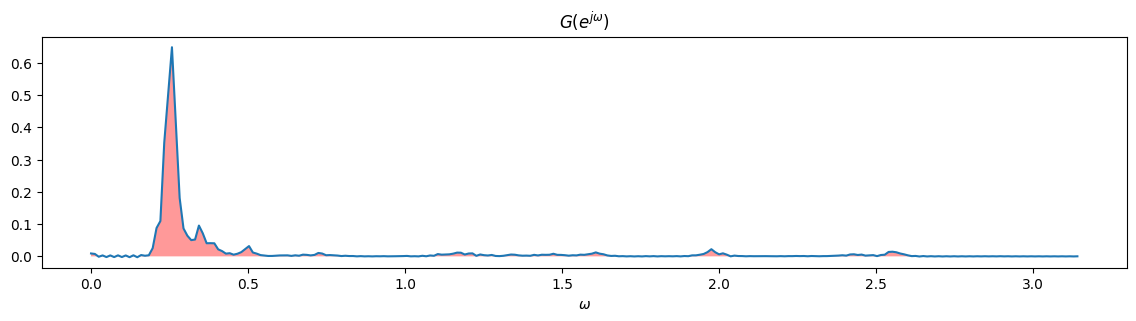

In [20]:
# >>>>>>>>>>>>>>>>> #power_band <<<<<<<<<<<<<<<<<<<<<<<<<
Fs = 16000
f1 = 0      # <---- in Hz, can be changed, try also 0
f2 = 8000   # <---- in Hz, can be changed, try also Fs / 2
omega1 = 2 * np.pi * f1 / Fs
omega2 = 2 * np.pi * f2 / Fs
om = khalf / Nfft * 2 * np.pi
# convert it to indices ...
k1 = int(Nfft * omega1 / 2 / np.pi)
k2 = int(Nfft * omega2 / 2 / np.pi)
print("f1 =",f1," f2 =",f2," omega1 =",omega1," omega2 =",omega2," k1 =",k1," k2 =",k2)
plt.figure(figsize=(14,3))
plt.plot(om, Gejo[khalf])
plt.gca().fill_between(om, Gejo[khalf], 0, where=((om >= omega1) & (om < omega2)) , facecolor='r', alpha=0.4)
plt.gca().set_xlabel('$\omega$')
plt.gca().set_title('$G(e^{j\omega})$')
P_band = 2 * np.sum(Gejo[k1:k2]) / Nfft * 2 * np.pi / 2 / np.pi   # / Nfft * 2 * np.pi because of integration
                                                        # division  2 / np.pi because of IDFT
print ("P_band = ",P_band)

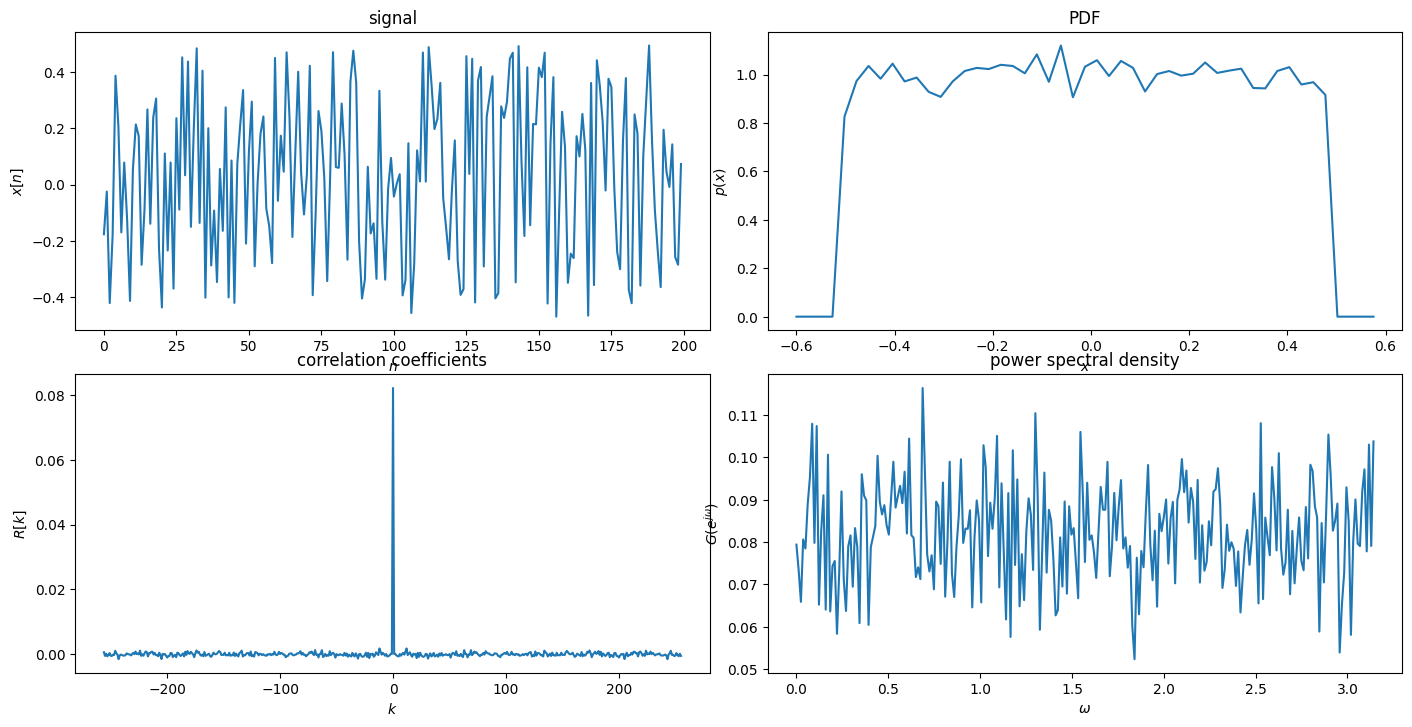

In [21]:
# >>>>>>>>>>>>>>>>> #uniform_white_noise <<<<<<<<<<<<<<<<<<<<<<<<<

def noise_analysis(x):
    """analysis and plotting for a random signal, it does
    - plots 200 samples of the signal
    - plots PDF
    - plots correlation coeffs
    - plots power spectral density (from correl coeffs) - norm. ang. frequency axis
    everything hard-coded, expects 50 * 512 = 25600 samples, Nfft set to 512.
    """
    N = x.size
    nzoom = range(200)
    Nfft = 512
    Nffthalf = int(Nfft / 2)

    fig, ax = plt.subplots(2,2, figsize=(14,7))
    fig.tight_layout()
    # show signal
    ax[0,0].plot(x[nzoom])
    ax[0,0].set_xlabel('$n$')
    ax[0,0].set_ylabel('$x[n]$')
    ax[0,0].set_title('signal')

    # PDF
    datamin = np.min(x)
    datamax = np.max(x)
    datarange = datamax - datamin
    bins = np.linspace(datamin-0.1*datarange,datamax+0.1*datarange,50)   # let the data decide ...
    hist,_ = np.histogram(x,bins=bins)
    DELTA = bins[1] - bins[0]
    binsvisu = bins[:-1]
    px = hist / N / DELTA
    ax[0,1].plot(binsvisu,px)
    ax[0,1].set_xlabel('$x$')
    ax[0,1].set_ylabel('$p(x)$')
    ax[0,1].set_title('PDF')

    # corr coeffs
    Rk = np.correlate(x, x, mode='full') / N
    k = np.arange(-Nffthalf,Nffthalf)
    Rk = Rk[k + N-1]    # attention, needs to re-index as k=0 is at Nth sample !
    ax[1,0].plot(k, Rk)
    ax[1,0].set_xlabel('$k$')
    ax[1,0].set_ylabel('$R[k]$')
    ax[1,0].set_title('correlation coefficients')

    # power spectral density
    Rkfft = np.fft.fftshift(Rk)
    Gejo = np.real(np.fft.fft(Rkfft))
    k_positive = np.arange(Nffthalf+1)    # wants only positive frequencies
    om = k_positive / Nfft * 2 * np.pi        # freq  axis will go from 0 to pi.
    ax[1,1].plot(om, Gejo[k_positive])
    ax[1,1].set_xlabel('$\omega$')
    ax[1,1].set_ylabel('$G(e^{j\omega})$')
    ax[1,1].set_title('power spectral density')

    return Gejo,om

N = 25600
noise = np.random.uniform(-0.5, 0.5, N)
_,_=noise_analysis(noise)

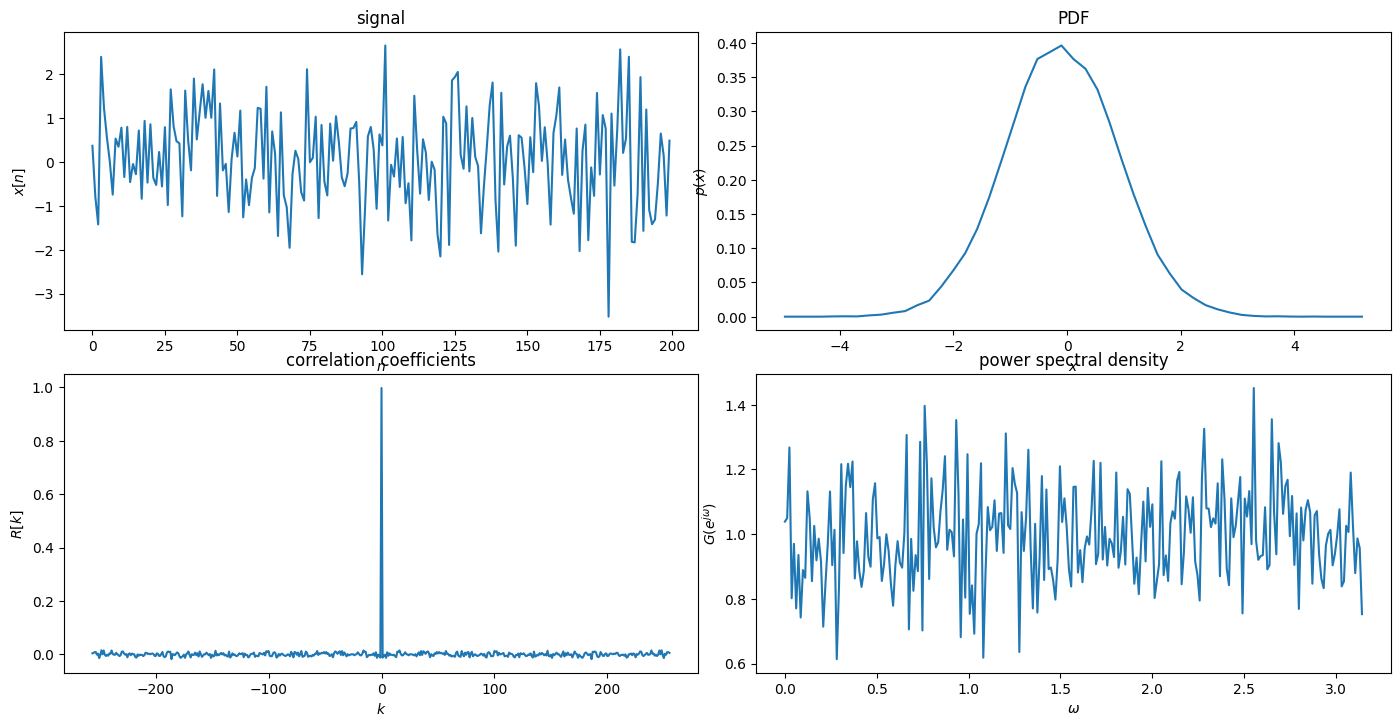

In [22]:
# >>>>>>>>>>>>>>>>> #gaussian_white_noise <<<<<<<<<<<<<<<<<<<<<<<<<
N = 25600
noise = np.random.standard_normal(N)
_,_=noise_analysis(noise)

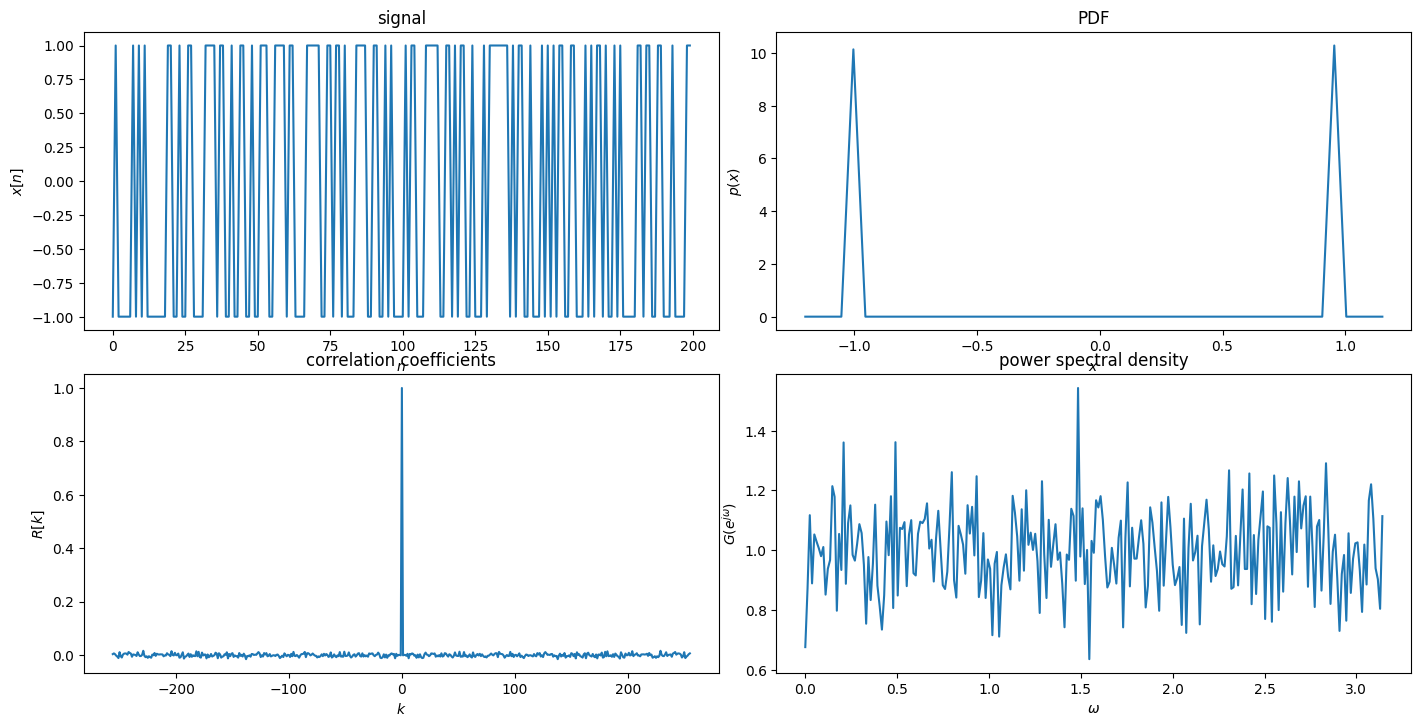

In [23]:
# >>>>>>>>>>>>>>>>> #binary_white_noise <<<<<<<<<<<<<<<<<<<<<<<<<
N = 25600
noise = np.random.choice([-1,1], N)
_,_=noise_analysis(noise)

Text(0, 0.5, '$G(e^{j\\omega})$')

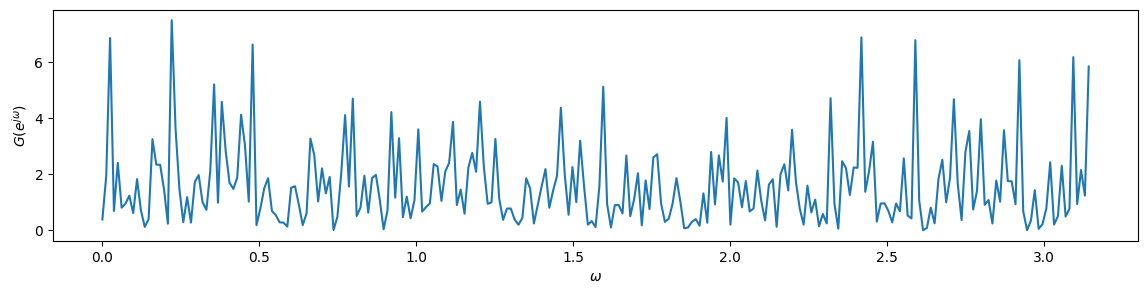

In [24]:
# >>>>>>>>>>>>>>>>> #white_noise_psd_by_dft <<<<<<<<<<<<<<<<<<<<<<<<<
N = 25600
noise = np.random.standard_normal(N)
#noise = np.random.uniform(-0.5, 0.5, N)    # can also try with this one ...
#noise = np.random.choice([-1,1], N)        # can also try with this one ...

Nfft = 512
Nffthalf = int(Nfft / 2)
khalf = np.arange(Nffthalf+1)
om = khalf / Nfft * 2 * np.pi

# PSD by FFT of just 512 samples ...
x = noise[0:512]
X = np.fft.fft(x)
Gejo_fft = np.real(X[khalf] * np.conj(X[khalf])) / frame_len
plt.figure(figsize=(14,3))
plt.plot(om,Gejo_fft[khalf])
plt.gca().set_xlabel(r'$\omega$')
plt.gca().set_ylabel('$G(e^{j\omega})$')


50 25600


Text(0, 0.5, '$G(e^{j\\omega})$')

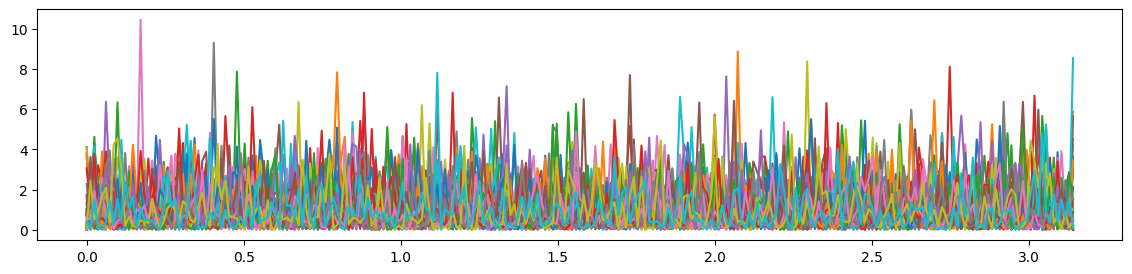

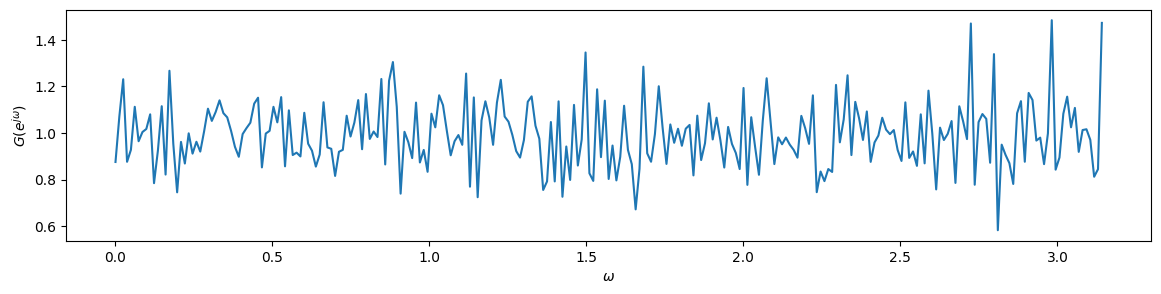

In [25]:
# segment to frames
frame_len = Nfft
FRAMES = np.reshape(noise,(-1,frame_len))
Nfr = FRAMES.shape[0]
print(Nfr, N)
plt.figure(figsize=(14,3))

# compute PSD by Welch
Gejo_welch = np.zeros(Nffthalf + 1)   # acuumulator for frame estimates
for frame in FRAMES:      # pedagogical implementation ... would be faster by matrices
    xfft  = np.pad(frame, (0, Nfft - frame_len), 'constant', constant_values=0)
    X = np.fft.fft(xfft)
    Gejo_fft = np.real(X[khalf] * np.conj(X[khalf])) / frame_len
    plt.plot(om, Gejo_fft[khalf])
    Gejo_welch = Gejo_welch + Gejo_fft
Gejo_welch = Gejo_welch / Nfr          # normalization by number of frames
plt.figure(figsize=(14,3))
plt.plot(om, Gejo_welch[khalf], label='power spectral density by Welch method')
plt.gca().set_xlabel(r'$\omega$')
plt.gca().set_ylabel('$G(e^{j\omega})$')


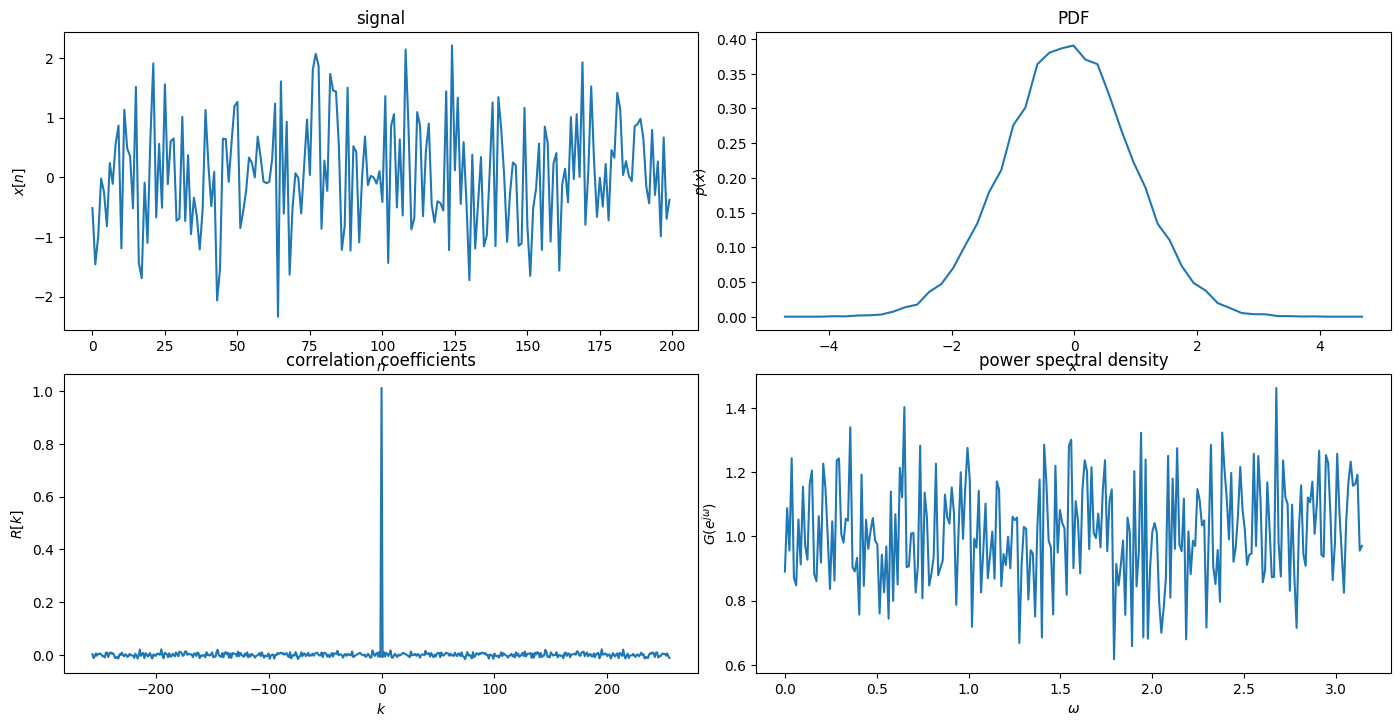

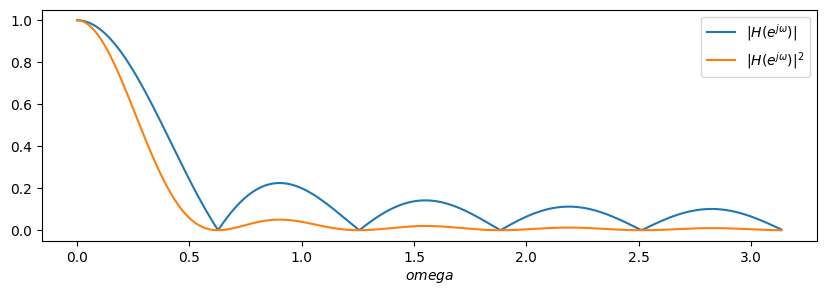

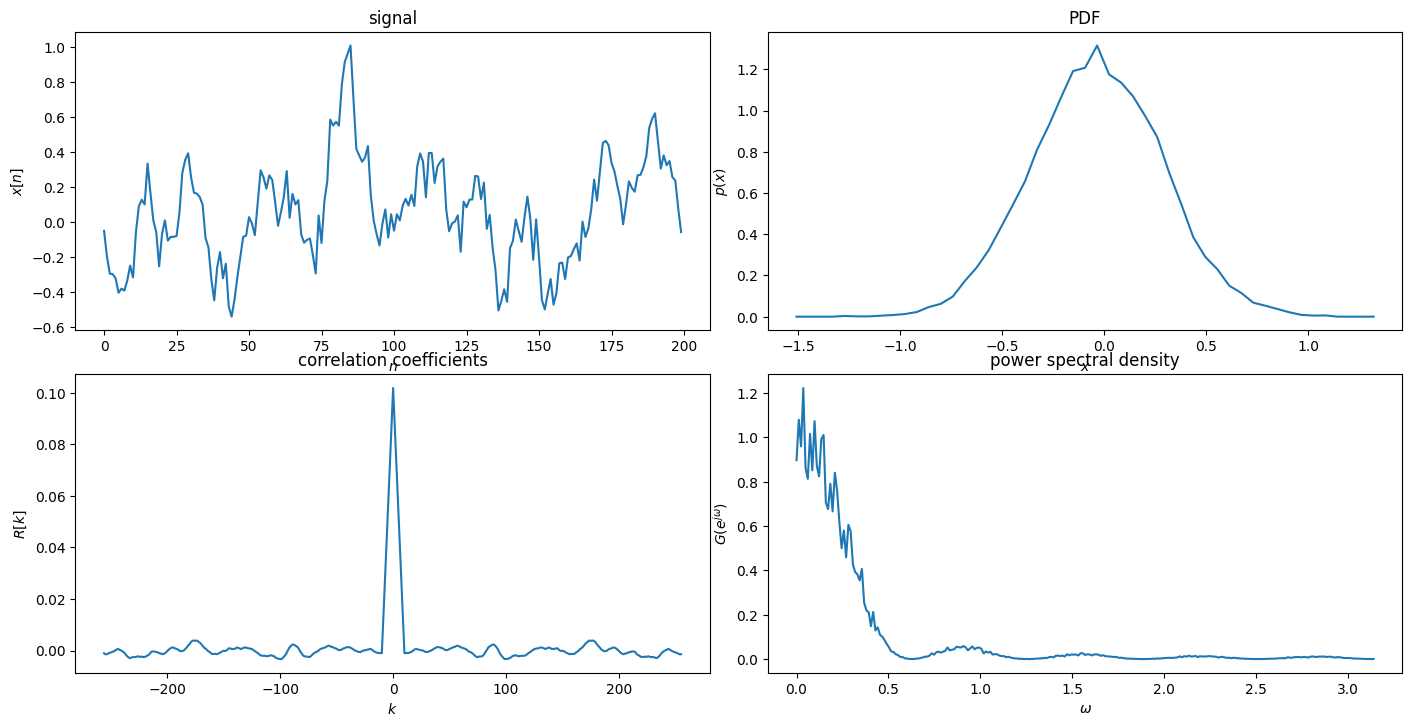

In [26]:
# >>>>>>>>>>>>>>>>> #filtering_random_signal <<<<<<<<<<<<<<<<<<<<<<<<<
N = 25600
Fs = 16000
noise = np.random.standard_normal(N)
_,_=noise_analysis(noise)
display(Audio(noise, rate=Fs))

# filter - just some averaging ...
B = 0.1 * np.ones(10)
w, H = freqz(B, 1)
H2 = np.real(np.conj(H) * H)
# magnitude
plt.figure(figsize=(10,3))
plt.plot(w, np.abs(H), label='$|H(e^{j\omega})|$')
plt.plot(w, H2, label='$|H(e^{j\omega})|^2$')
plt.gca().legend()
plt.gca().set_xlabel('$omega$')

# filtering
out_noise = lfilter(B,1,noise)
_,_=noise_analysis(out_noise)
display(Audio(out_noise, rate=Fs))

SNR =  -5  Px =  0.013348486551265231  Pe wanted = 0.042211620818124095  Pe obtained =  0.04209309295785322  SNR obtained = -4.987788101689896


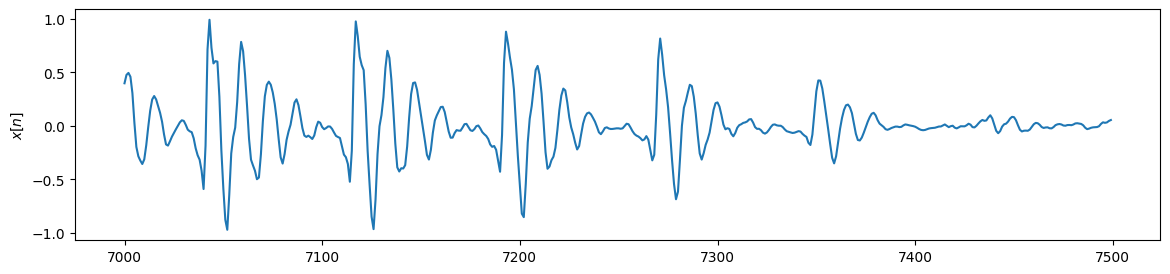

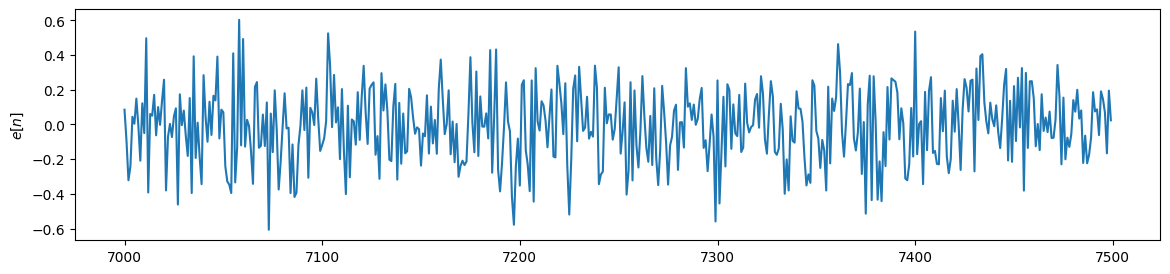

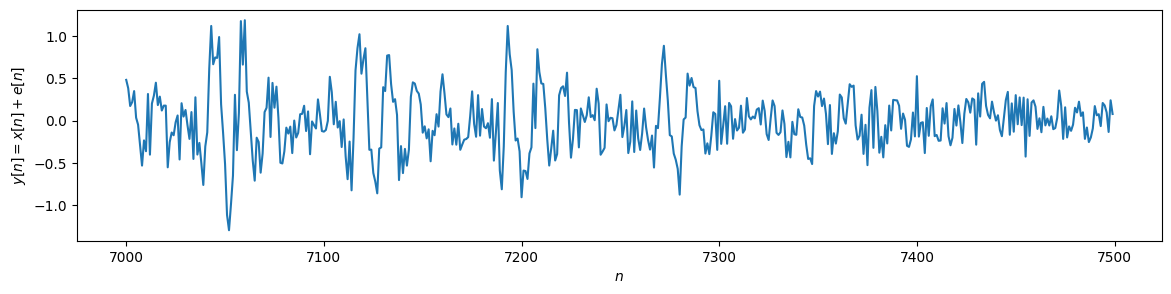

In [32]:
# >>>>>>>>>>>>>>>>> #SNR_examples <<<<<<<<<<<<<<<<<<<<<<<<<
x, Fs = sf.read('prase.wav')
x = x - np.mean(x)
N = x.size
display(Audio(x, rate=Fs))
Px = np.sum(x ** 2) / N

SNRwanted = -5   # <------------- set SNR here, recommended values are -20, -10, 0, 10, 20
Pewanted = Px / np.power(10, SNRwanted / 10)
e = np.sqrt(Pewanted) * np.random.standard_normal(N)
Pe = np.sum(e ** 2) / N
SNR = 10 * np.log10(Px / Pe)

# noise the signal
y = x + e

nzoom = np.arange(7000, 7500)
plt.figure(figsize=(14,3))
plt.plot(nzoom,x[nzoom])
plt.gca().set_ylabel('$x[n]$')
plt.figure(figsize=(14,3))
plt.plot(nzoom,e[nzoom])
plt.gca().set_ylabel('$e[n]$')
plt.figure(figsize=(14,3))
plt.plot(nzoom,y[nzoom])
plt.gca().set_ylabel('$y[n] = x[n]+e[n]$')
plt.gca().set_xlabel(r'$n$')

print("SNR = ", SNRwanted, " Px = ",Px," Pe wanted =", Pewanted, " Pe obtained = ", Pe, " SNR obtained =", SNR)
display(Audio(x+e, rate=Fs))


SNR =  7.791337111331016  dB


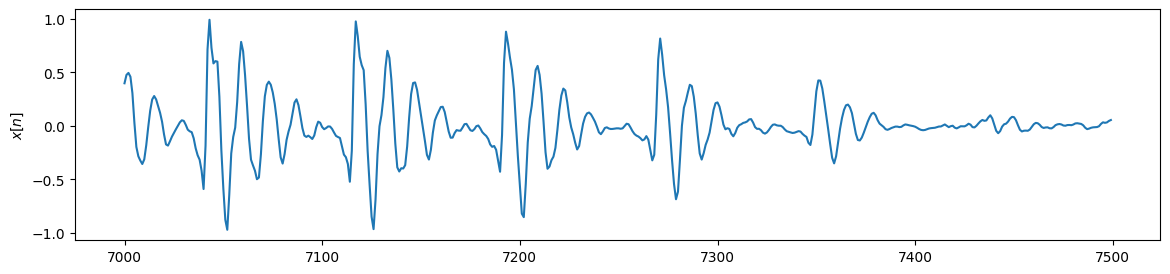

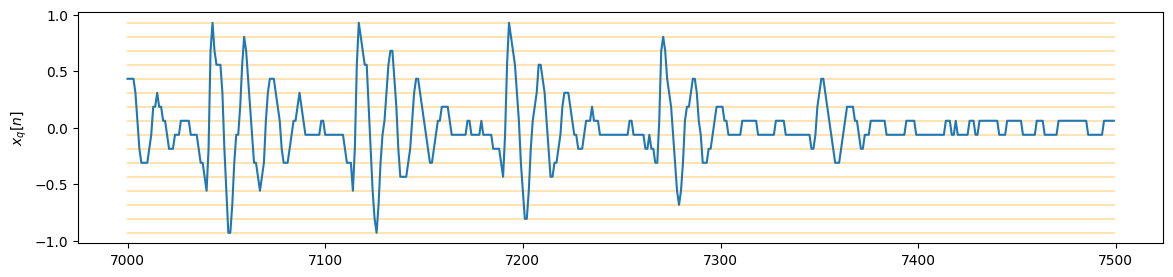

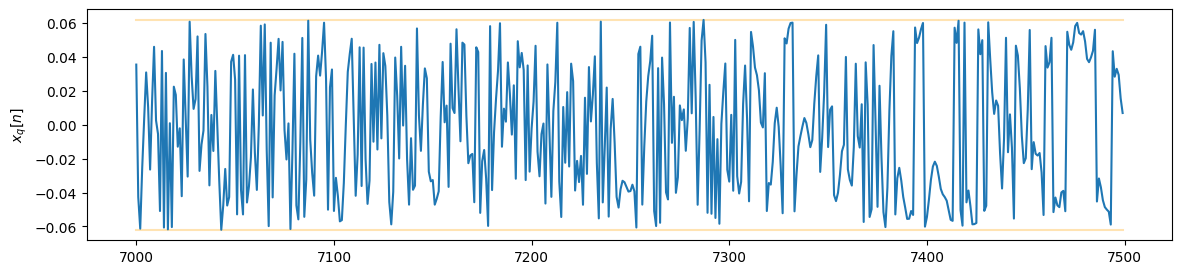

In [34]:
# >>>>>>>>>>>>>>>>> #quantization <<<<<<<<<<<<<<<<<<<<<<<<<
b = 4    # <------ set number of bits here
L = 2 ** b
# define the quqntization levels
maxabs = np.max(np.abs(x))
DELTA =  2 * maxabs / L      # the correct quantization step
bins = np.linspace(-maxabs+DELTA, maxabs-DELTA, L-1)   # -infty and +infty are implicit, has to provide L-1 values !
Qs = np.linspace(-maxabs+DELTA/2, maxabs-DELTA/2, L)   # Q levels are at the centers of bins.

# do quantization
indices = np.digitize(x,bins)
xq = Qs[(indices)]

# show original
plt.figure(figsize=(14,3))
plt.plot(nzoom,x[nzoom])
plt.gca().set_ylabel('$x[n]$')
# show quantized
plt.figure(figsize=(14,3))
showqlevels = np.outer(Qs, np.ones(N)).T
plt.plot(nzoom,showqlevels[nzoom],color='orange', alpha=0.3)
plt.plot(nzoom,xq[nzoom])
plt.gca().set_ylabel('$x_q[n]$')
# show error
e = xq - x
plt.figure(figsize=(14,3))
showhalfdelta = np.outer([-DELTA/2, DELTA/2], np.ones(N)).T
plt.plot(nzoom,showhalfdelta[nzoom],color='orange', alpha=0.3)
plt.plot(nzoom,e[nzoom])
plt.gca().set_ylabel('$x_q[n]$')

# get SNR
Px = np.sum(x ** 2) / N
Pe = np.sum(e ** 2) / N
SNR = 10 * np.log10(Px / Pe)
print("SNR = ", SNR, " dB")

display(Audio(x, rate=Fs))
display(Audio(xq, rate=Fs))


theoretical SNR =  31.76  dB,    estimated SNR =  31.47300536851177  dB


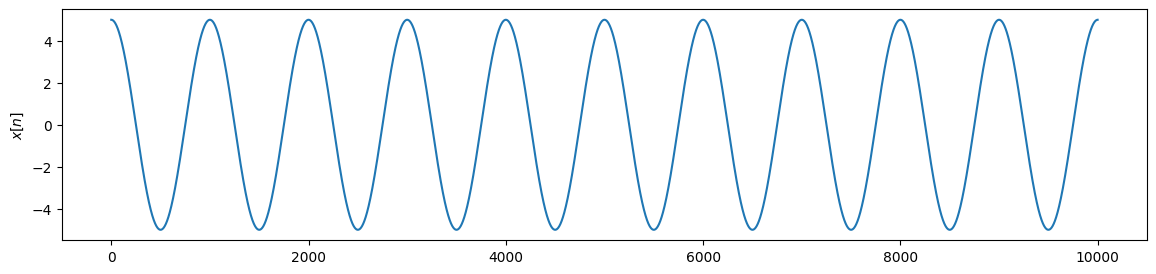

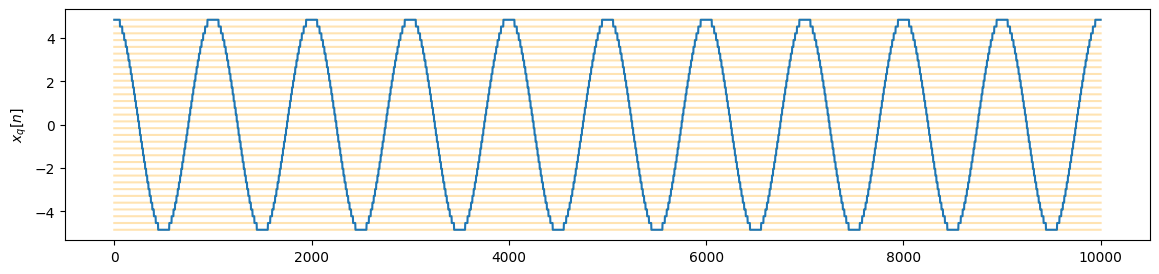

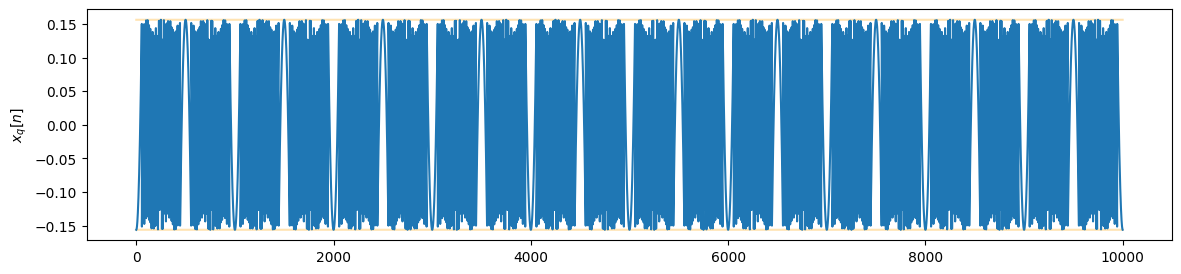

In [29]:
# >>>>>>>>>>>>>>>>> #quantization <<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>> #quant_SNR <<<<<<<<<<<<<<<<<<<<<<<<<
N = 10000
PERIOD = 1000  # period in samples
A = 5          # magnitude

# generate the cos and show it
n = np.arange(N)
x = A * np.cos(2 * np.pi * n / PERIOD)
plt.figure(figsize=(14,3))
plt.plot(n,x)
plt.gca().set_ylabel('$x[n]$')


# do quantization
b = 5    # <------ set number of bits here
L = 2 ** b
# define the quantization levels
maxabs = np.max(np.abs(x))
DELTA =  2 * maxabs / L      # the correct quantization step
bins = np.linspace(-maxabs+DELTA, maxabs-DELTA, L-1)   # -infty and +infty are implicit, has to provide L-1 values !
Qs = np.linspace(-maxabs+DELTA/2, maxabs-DELTA/2, L)   # Q levels are at the centers of bins.
indices = np.digitize(x,bins)
xq = Qs[(indices)]

# show quantized
plt.figure(figsize=(14,3))
showqlevels = np.outer(Qs, np.ones(N)).T
plt.plot(n,showqlevels,color='orange', alpha=0.3)
plt.plot(n,xq)
plt.gca().set_ylabel('$x_q[n]$')
# show error
e = xq - x
plt.figure(figsize=(14,3))
showhalfdelta = np.outer([-DELTA/2, DELTA/2], np.ones(N)).T
plt.plot(n,showhalfdelta,color='orange', alpha=0.3)
plt.plot(n,e)
plt.gca().set_ylabel('$x_q[n]$')

# get SNR
Px = np.sum(x ** 2) / N
Pe = np.sum(e ** 2) / N
SNR = 10 * np.log10(Px / Pe)
SNRtheory = 1.76 + 6 * b
print("theoretical SNR = ", SNRtheory, " dB,", "   estimated SNR = ", SNR, " dB")
